In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import missingno as msno

plt.style.use("seaborn")
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,10)
%matplotlib inline

pd.set_option("display.max_columns", 100)

import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
# вспомогательная ф-я для проверки основной гипотезы о независимости непрервыной величины(SalePrice) от категориальной
def test_chisquare_10bins(data, categorical_feature, categories):
    """
        
    """
    cut_sale_price = pd.cut(data["SalePrice"], bins=10)
    expected = cut_sale_price.value_counts(normalize=True).sort_index()
    
    interval_index = cut_sale_price.cat.categories
    
    data_group_by_categorical_feature = data.groupby(by=[categorical_feature])
    
    for category in categories:
        sale_price_category = data_group_by_categorical_feature.get_group(category)["SalePrice"]
        
        observed = pd.cut(sale_price_category, bins=interval_index).value_counts(normalize=True).sort_index()
        
        print(category, ":", sp.stats.chisquare(f_obs=observed.values.reshape(-1), f_exp=expected.values.reshape(-1)))

<font color="green" size=5>1. Тщательный анализ данных.</font>

<font color="green" size=3>1.1)</font>
Исследовать данные на наличие пропусков и некорректных значений. Либо удалить их, либо сделать imputing (проинтерполировать).

In [3]:
data_train = pd.read_csv("train.csv", sep=",", index_col=0)
data_train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1456         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1457         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1458         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1459         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1460         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1          Norm     1Fam     2Story            7            5       2003   
2          Norm     1Fam     1Story            6            8       1976   
3          Norm     1Fam     2Story            7            5       2001   
4          Norm     1Fam     2Story            7            5       1915   
5          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1456       Norm     1Fam     2Story            6            5       1999   
1457       Norm     1Fam     1Story            6            6       1978   
1458       Norm     1Fam     2Story            7            9       1941   
1459       Norm     1Fam     1Story            5            6       1950   
1460       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2             1976     Gable  CompShg     MetalSd     MetalSd       None   
3             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1456          2000     Gable  CompShg     VinylSd     VinylSd       None   
1457          1988     Gable  CompShg     Plywood     Plywood      Stone   
1458          2006     Gable  CompShg     CemntBd     CmentBd       None   
1459          1996       Hip  CompShg     MetalSd     MetalSd       None   
1460          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                            

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
data_train.isna().mean().sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
MSSubClass      0.000000
dtype: float64

In [6]:
# PoolQC, Fence, MiscFeature, FireplaceQu, Alley more 45% missing values

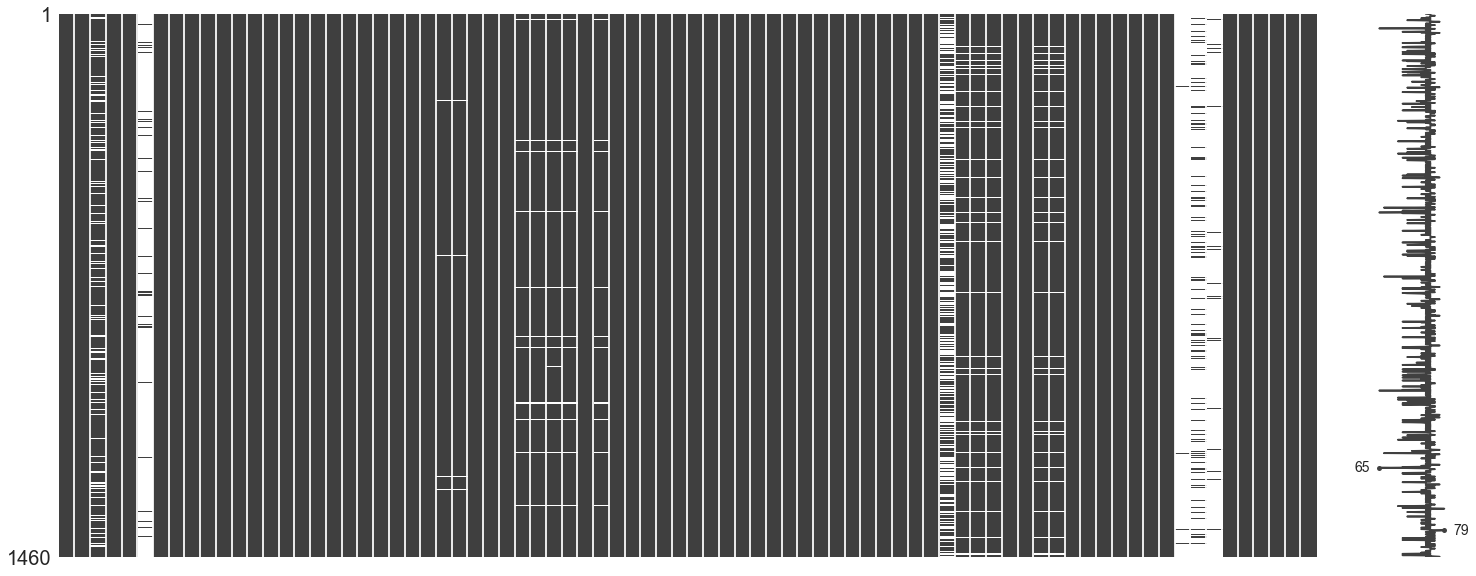

In [7]:
msno.matrix(data_train);

In [8]:
data_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [9]:
data_train.describe(include="object")

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [10]:
data_test = pd.read_csv("test.csv", sep=",", index_col=0)
data_test

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2915         160       RM         21.0     1936   Pave   NaN      Reg   
2916         160       RM         21.0     1894   Pave   NaN      Reg   
2917          20       RL        160.0    20000   Pave   NaN      Reg   
2918          85       RL         62.0    10441   Pave   NaN      Reg   
2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1461         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1462         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1463         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1464         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1465         HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
2915         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2916         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
2917         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2918         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
2919         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1461       Norm     1Fam     1Story            5            6       1961   
1462       Norm     1Fam     1Story            6            6       1958   
1463       Norm     1Fam     2Story            5            5       1997   
1464       Norm     1Fam     2Story            6            6       1998   
1465       Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
2915       Norm    Twnhs     2Story            4            7       1970   
2916       Norm   TwnhsE     2Story            4            5       1970   
2917       Norm     1Fam     1Story            5            7       1960   
2918       Norm     1Fam     SFoyer            5            5       1992   
2919       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1461          1961     Gable  CompShg     VinylSd     VinylSd       None   
1462          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1463          1998     Gable  CompShg     VinylSd     VinylSd       None   
1464          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1465          1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
2915          1970     Gable  CompShg     CemntBd     CmentBd       None   
2916          1970     Gable  CompShg     CemntBd     CmentBd       None   
2917          1996     Gable  CompShg     VinylSd     VinylSd       None   
2918          1992     Gable  CompShg     HdBoard     Wd Shng       None   
2919          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                            

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [12]:
data_test.isna().mean().sort_values(ascending=False)[:20]

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageQual      0.053461
GarageCond      0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType2    0.028787
BsmtFinType1    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
Functional      0.001371
dtype: float64

In [13]:
# PoolQC, MiscFeatures, Alley, Fence, FireplaceQu - more 50% missing values

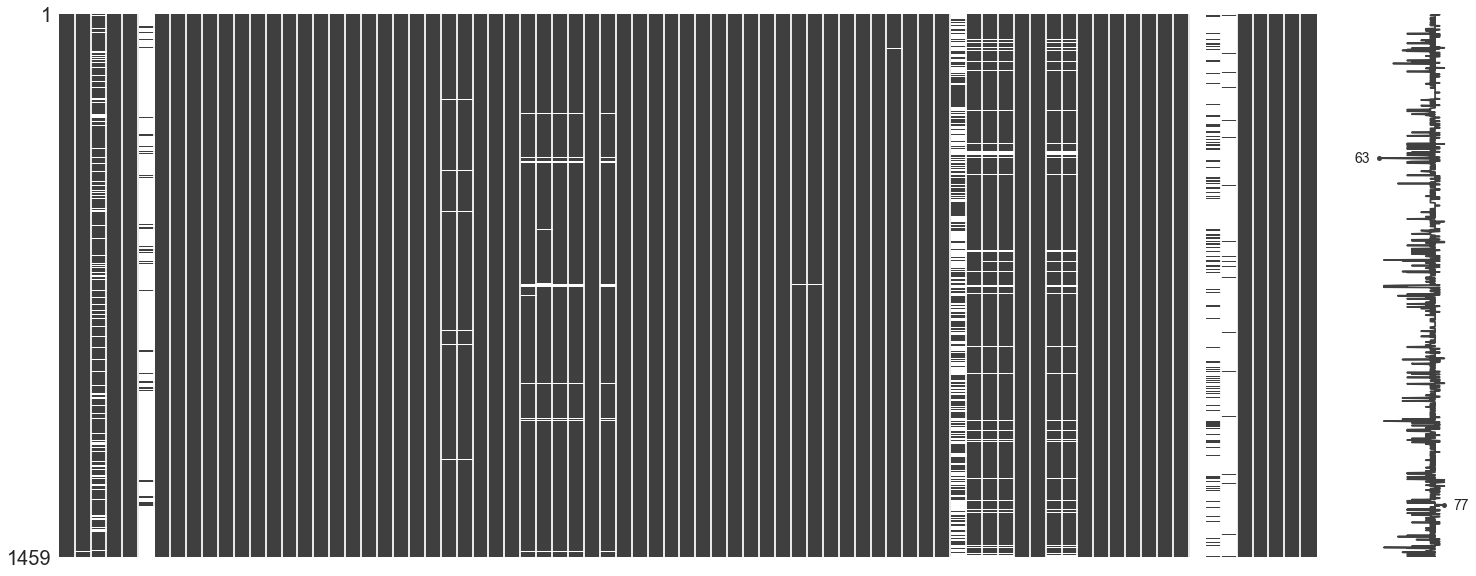

In [14]:
msno.matrix(data_test);

In [15]:
data_test.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000   
mean   1971.357779   1983.662783   100.709141   439.203704    52.619342   
std      30.390071     21.130467   177.625900   455.268042   176.753926   
min    1879.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.000000   1963.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1992.000000     0.000000   350.500000     0.000000   
75%    2001.000000   2004.000000   164.000000   753.500000     0.000000   
max    2010.000000   2010.000000  1290.000000  4010.000000  1526.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1458.000000  1458.000000  1459.000000  1459.000000   1459.000000   
mean    554.294925  1046.117970  1156.534613   325.967786      3.543523   
std     437.260486   442.898624   398.165820   420.610226     44.043251   
min       0.000000     0.000000   407.000000     0.000000      0.000000   
25%     219.250000   784.000000   873.500000     0.000000      0.000000   
50%     460.000000   988.000000  1079.000000     0.000000      0.000000   
75%     797.750000  1305.000000  1382.500000   676.000000      0.000000   
max    2140.000000  5095.000000  5095.000000  1862.000000   1064.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1459.000000   1457.000000   1457.000000  1459.000000  1459.000000   
mean   1486.045922      0.434454      0.065202     1.570939     0.377656   
std     485.566099      0.530648      0.252468     0.555190     0.503017   
min     407.000000      0.000000      0.000000     0.000000     0.000000   
25%    1117.500000      0.000000      0.000000     1.000000     0.000000   
50%    1432.000000      0.000000      0.000000     2.000000     0.000000   
75%    1721.000000      1.000000      0.000000     2.000000     1.000000   
max    5095.000000      3.000000      2.000000     4.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count   1459.000000   1459.000000   1459.000000  1459.00000  1381.000000   
mean       2.854010      1.042495      6.385195     0.58122  1977.721217   
std        0.829788      0.208472      1.508895     0.64742    26.431175   
min        0.000000      0.000000      3.000000     0.00000  1895.000000   
25%        2.000000      1.000000      5.000000     0.00000  1959.000000   
50%        3.000000      1.000000      6.000000     0.00000  1979.000000   
75%        3.000000      1.000000      7.000000     1.00000  2002.000000   
max        6.000000      2.000000     15.000000     4.00000  2207.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1458.000000  1458.000000  1459.000000  1459.000000    1459.000000   
mean      1.766118   472.768861    93.174777    48.313914      24.243317   
std       0.775945   217.048611   127.744882    68.883364      67.227765   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   318.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    28.000000       0.000000   
75%       2.000000   576.000000   168.000000    72.000000       0.000000   
ma

In [16]:
data_test.describe(include="object")

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1459   107     1459        1459      1457      1459   
unique        5      2     2        4           4         1         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1114   1453    70      934        1311      1457      1081   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1459         1459       1459       1459     1459       1459   
unique         3           25          9          5        5          7   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1396          218       1251       1444     1205        745   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1459     1459        1458        1458       1443      1459   
unique         6        4          13          15          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1169     1442         510         510        878       892   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1459       1459     1415     1414         1415         1417   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          GLQ   
freq        1256        661      634     1295          951          431   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1417    1459      1459       1459       1459        1458   
unique            6       4         5          2          4           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1237    1446       752       1358       1337         757   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1457         729       1383         1381       1381       1381   
unique          7           5          6            3          4          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1357         364        853          625       1293       1328   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1459      3    290          51     1458          1459  
unique          3      2      4           3        9             6  
top             Y     Ex  MnPrv        Shed       WD        Normal  
freq         1301      2    172          46     1258          1204

In [17]:
data_train.describe(include="object").loc["unique"] ==  data_test.describe(include="object").loc["unique"]

MSZoning          True
Street            True
Alley             True
LotShape          True
LandContour       True
Utilities        False
LotConfig         True
LandSlope         True
Neighborhood      True
Condition1        True
Condition2       False
BldgType          True
HouseStyle       False
RoofStyle         True
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual         True
ExterCond         True
Foundation        True
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC         True
CentralAir        True
Electrical       False
KitchenQual       True
Functional        True
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual       False
GarageCond        True
PavedDrive        True
PoolQC           False
Fence             True
MiscFeature      False
SaleType          True
SaleCondition     True
Name: uniqu

In [18]:
# кол-во категорий в некоторых категориальных признкаках data_train и data_dest не совпадают,
# поэтому стоит учитывать это при заполнении пропусков в данных

<font color="green" size=3>1.1) Выводы</font>

In [19]:
# features to delete, because there are a lot of missing values
skip_columns = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]

In [20]:
# Признаки, в которых разное кол-во категорий для data_train и data_test
diff_number_of_cat_columns = ["Utilities", "Condition2", "HouseStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "Heating", "Electrical", "GarageQual"]      

In [21]:
data_train_skip_columns = data_train.drop(columns=skip_columns)
data_test_skip_columns = data_test.drop(columns=skip_columns)

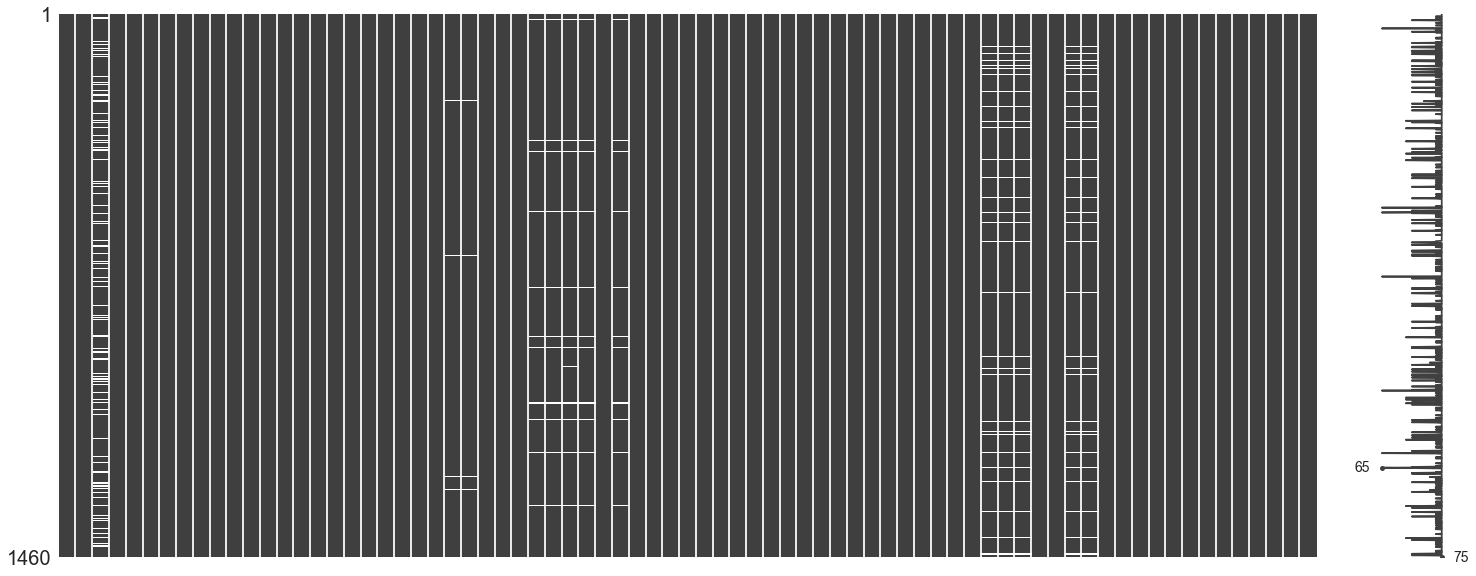

In [22]:
msno.matrix(data_train_skip_columns);

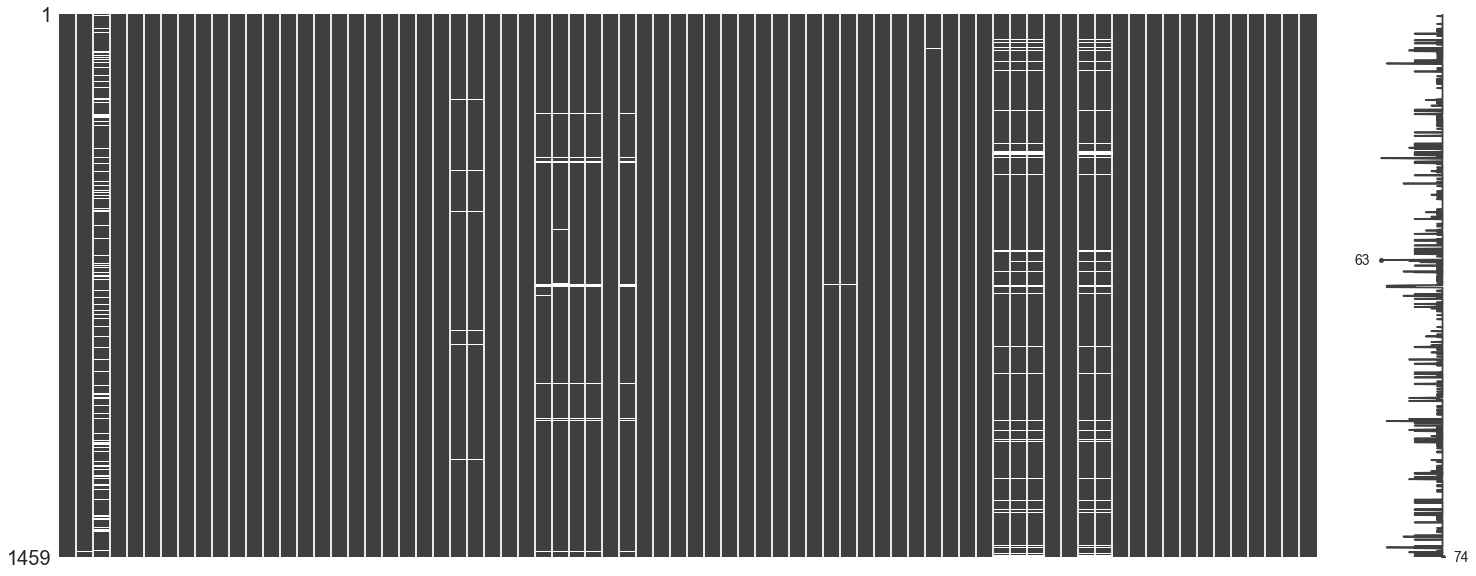

In [23]:
msno.matrix(data_test_skip_columns);

<font color="green" size=3>1.2)</font>
Посмотреть на распределение целевой переменной. Идентифицировать аномалии. Решить, что делать: убрать выбросы из датасета или преобразовать целевую переменную (например, посредством преобразования Бокса-Кокса).

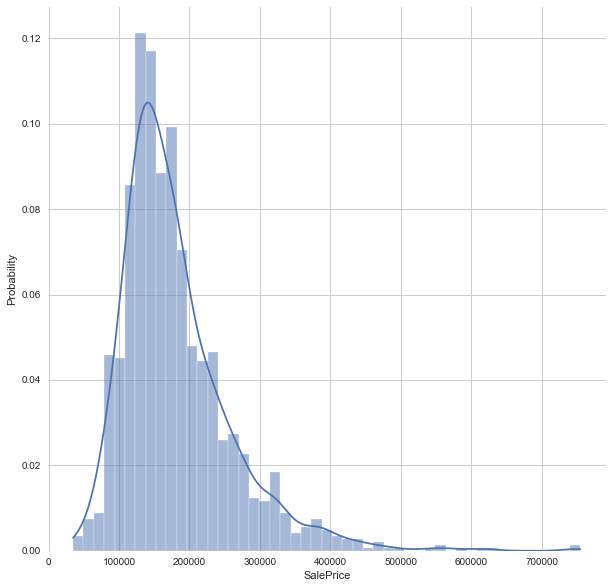

In [24]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data_train_skip_columns["SalePrice"], kde=True, stat="probability");

In [25]:
# > 520000 - выбросы, посмотрим более детально на них
data_train_skip_columns[data_train_skip_columns["SalePrice"] > 520000]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
441           20       RL        105.0    15431   Pave      Reg         Lvl   
692           60       RL        104.0    21535   Pave      IR1         Lvl   
770           60       RL         47.0    53504   Pave      IR2         HLS   
804           60       RL        107.0    13891   Pave      Reg         Lvl   
899           20       RL        100.0    12919   Pave      IR1         Lvl   
1047          60       RL         85.0    16056   Pave      IR1         Lvl   
1170          60       RL        118.0    35760   Pave      IR1         Lvl   
1183          60       RL        160.0    15623   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
Id                                                                      
441     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
692     AllPub    Corner       Gtl      NoRidge       Norm       Norm   
770     AllPub   CulDSac       Mod      StoneBr       Norm       Norm   
804     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
899     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
1047    AllPub    Inside       Gtl      StoneBr       Norm       Norm   
1170    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm   
1183    AllPub    Corner       Gtl      NoRidge       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                            
441      1Fam     1Story           10            5       2008          2008   
692      1Fam     2Story           10            6       1994          1995   
770      1Fam     2Story            8            5       2003          2003   
804      1Fam     2Story            9            5       2008          2009   
899      1Fam     1Story            9            5       2009          2010   
1047     1Fam     2Story            9            5       2005          2006   
1170     1Fam     2Story           10            5       1995          1996   
1183     1Fam     2Story           10            5       1996          1996   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
Id                                                                       
441        Hip  CompShg     VinylSd     VinylSd      Stone       200.0   
692      Gable  WdShngl     HdBoard     HdBoard    BrkFace      1170.0   
770        Hip  CompShg     CemntBd     Wd Shng    BrkFace       603.0   
804        Hip  CompShg     VinylSd     VinylSd      Stone       424.0   
899        Hip  CompShg     VinylSd     VinylSd      Stone       760.0   
1047       Hip  CompShg     CemntBd     CmentBd      Stone       208.0   
1170       Hip  CompShg     HdBoard     HdBoard    BrkFace      1378.0   
1183       Hip  CompShg     Wd Sdng     ImStucc       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                   
441         Ex        TA      PConc       Ex       TA           Gd   
692         Ex        TA      PConc       Ex       TA           Gd   
770         Ex        TA      PConc       Gd       TA           Gd   
804         Ex        TA      PConc       Ex       TA           Gd   
899         Ex        TA      PConc       Ex       TA           Gd   
1047        Gd        TA      PConc       Ex       TA           Av   
1170        Gd        Gd      PConc       Ex       TA           Gd   
1183        Gd        TA      PConc       Ex       TA           Av   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                  
441           GLQ        1767          ALQ         539        788   
692           GLQ        1455          Unf  

In [26]:
data_train_skip_columns[data_train_skip_columns["SalePrice"] > 520000].describe() 

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count    8.000000     8.000000      8.000000     8.000000     8.000000   
mean    50.000000   103.250000  23089.875000     9.375000     5.125000   
std     18.516402    31.540224  14342.358288     0.744024     0.353553   
min     20.000000    47.000000  12919.000000     8.000000     5.000000   
25%     50.000000    96.250000  15046.000000     9.000000     5.000000   
50%     60.000000   104.500000  15839.500000     9.500000     5.000000   
75%     60.000000   109.750000  25091.250000    10.000000     5.000000   
max     60.000000   160.000000  53504.000000    10.000000     6.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  BsmtFinSF2  \
count     8.000000       8.00000     8.000000     8.000000    8.000000   
mean   2002.250000    2002.87500   592.875000  1318.625000   67.375000   
std       6.318906       6.33443   486.977101   801.438339  190.565278   
min    1994.000000    1995.00000     0.000000     0.000000    0.000000   
25%    1995.750000    1996.00000   206.000000  1100.250000    0.000000   
50%    2004.000000    2004.50000   513.500000  1435.500000    0.000000   
75%    2008.000000    2008.25000   862.500000  1849.250000    0.000000   
max    2009.000000    2010.00000  1378.000000  2188.000000  539.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count     8.000000     8.000000     8.000000     8.000000           8.0   
mean    810.250000  2196.250000  2108.500000  1160.750000           0.0   
std     641.766925   470.530931   329.818132   818.669783           0.0   
min     142.000000  1650.000000  1690.000000     0.000000           0.0   
25%     283.500000  1881.000000  1806.750000   657.000000           0.0   
50%     665.500000  2161.000000  2178.000000  1338.500000           0.0   
75%    1175.250000  2408.000000  2404.250000  1815.000000           0.0   
max    1752.000000  3094.000000  2444.000000  2065.000000           0.0   

         GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
count     8.000000      8.000000      8.000000   8.00000  8.000000   
mean   3269.250000      0.625000      0.125000   2.75000  0.875000   
std     811.756957      0.517549      0.353553   0.46291  0.353553   
min    2364.000000      0.000000      0.000000   2.00000  0.000000   
25%    2717.000000      0.000000      0.000000   2.75000  1.000000   
50%    3073.500000      1.000000      0.000000   3.00000  1.000000   
75%    3799.250000      1.000000      0.000000   3.00000  1.000000   
max    4476.000000      1.000000      1.000000   3.00000  1.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
count       8.00000           8.0      8.000000    8.000000     8.000000   
mean        3.50000           1.0     10.750000    1.500000  2002.375000   
std         0.92582           0.0      0.886405    0.534522     6.457277   
min         2.00000           1.0     10.000000    1.000000  1994.000000   
25%         3.50000           1.0     10.000000    1.000000  1995.750000   
50%         4.00000           1.0     10.500000    1.500000  2004.000000   
75%         4.00000           1.0     11.250000    2.000000  2008.250000   
max         4.00000           1.0     12.000000    2.000000  2009.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count         8.0     8.000000    8.000000     8.000000            8.0   
mean          3.0   815.125000  210.375000    82.125000            0.0   
std           0.0   102.352943  190.087903    41.294889            0.0   
min           3.0   672.000000    0.000000    36.000000            0.0   
25%           3.0   784.250000   39.000000    62.750000            0.0   
50%           3.0   816.500000  192.500000    74.000000            0.0   
75%           3.0   834.250000  366.250000    85.500000            0.0   
max           3.0  1020.000000  503.000000   170.000000            0.0   

       3SsnPor

In [27]:
data_train_skip_columns[~(data_train_skip_columns["SalePrice"] > 520000)].describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1452.000000  1193.000000    1452.000000  1452.000000  1452.000000   
mean     56.935262    69.827326   10447.555096     6.081267     5.577824   
std      42.394409    24.091869    9914.947758     1.364210     1.115089   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7526.250000     5.000000     5.000000   
50%      50.000000    69.000000    9452.500000     6.000000     5.000000   
75%      70.000000    80.000000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1452.000000   1452.000000  1444.000000  1452.000000  1452.000000   
mean   1971.097107   1984.766529   100.975069   438.818871    46.434573   
std      30.194879     20.654085   174.591707   449.254299   161.213495   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000   
50%    1972.000000   1993.000000     0.000000   381.000000     0.000000   
75%    2000.000000   2004.000000   162.250000   706.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1452.000000  1452.000000  1452.000000  1452.000000   1452.000000   
mean    565.901515  1051.154959  1157.415289   342.508953      5.876722   
std     440.464028   430.424860   380.511970   429.771174     48.754995   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     222.500000   794.750000   882.000000     0.000000      0.000000   
50%     475.000000   990.000000  1085.500000     0.000000      0.000000   
75%     808.000000  1286.500000  1383.000000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  1818.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1452.000000   1452.000000   1452.000000  1452.000000  1452.000000   
mean   1505.800964      0.424242      0.057163     1.558540     0.380165   
std     507.367354      0.518883      0.238094     0.544393     0.502337   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1128.000000      0.000000      0.000000     1.000000     0.000000   
50%    1457.000000      0.000000      0.000000     2.000000     0.000000   
75%    1771.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1452.000000   1452.000000    1452.00000  1452.000000  1371.000000   
mean       2.862948      1.046832       6.49449     0.608127  1978.366885   
std        0.814127      0.220918       1.59793     0.641986    24.689731   
min        0.000000      0.000000       2.00000     0.000000  1900.000000   
25%        2.000000      1.000000       5.00000     0.000000  1961.000000   
50%        3.000000      1.000000       6.00000     1.000000  1979.000000   
75%        3.000000      1.000000       7.00000     1.000000  2002.000000   
max        8.000000      3.000000      14.00000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1452.000000  1452.000000  1452.000000  1452.000000    1452.000000   
mean      1.760331   471.095041    93.604683    46.464876      22.075069   
std       0.743729   212.755793   124.688997    66.323940      61.265602   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   327.750000     0.000000     0.000000       0.000000   
50%       2.000000   478.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [28]:
# аномально большие показатели LotArea для всех дорогих участков, минимальная площадь 12919 > 75% квантиля для всех оставшихся данных
# OverallQual > 8 для всех дорогих участков 
# также относительно новые постройки YearBuilt, min = 1994 > 50% квантиля для всех остальных данных
# TotalBsmtSF - огромные размеры подвалов, min = 1650 > 75% квантиль для остальных данных
# 1stFlrSF - огромные размеры, 
# 2ndFlrSF - имеет смысл обьединить данные признаки
# LowQualFinSF  = 0 
# GrLivArea - также огромные размеры, min = 2364 > 75% квантиль остальных данных
# TotRmsAbvGrd - min = 10 %> 75% квантиль остальных данных
# GarageYrBlt - также недавно построен, но оно логично так как гаражи строятся позже домов, а дома как мы выясниили молодые
# GarageCars - от 3х машин > 75% квантль остальных данных
# GarageArea - скорее всего лучше взять именно этот признак, min=672 > 75% кванить для остальных данных
# EnclosedPorch = 0 для всех домов
# 3SsnPorch = 0  для всех домов

In [29]:
data_train_skip_columns[data_train_skip_columns["SalePrice"] > 520000].describe(include="object")

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count         8      8        8           8         8         8         8   
unique        1      1        3           2         1         3         2   
top          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
freq          8      8        5           7         8         4         7   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count             8          8          8        8          8         8   
unique            3          1          1        1          2         2   
top         NoRidge       Norm       Norm     1Fam     2Story       Hip   
freq              3          8          8        8          6         7   

       RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
count         8           8           8          8         8         8   
unique        2           4           5          3         2         2   
top     CompShg     VinylSd     VinylSd      Stone        Ex        TA   
freq          7           3           3          4         5         7   

       Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count           8        8        8            8            8            8   
unique          1        2        1            2            3            2   
top         PConc       Ex       TA           Gd          GLQ          Unf   
freq            8        7        8            6            6            7   

       Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
count        8         8          8          8           8          8   
unique       1         1          1          1           2          2   
top       GasA        Ex          Y      SBrkr          Ex        Typ   
freq         8         8          8          8           7          7   

       GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
count           8            8          8          8          8        8   
unique          2            2          1          1          1        2   
top        Attchd          Fin         TA         TA          Y       WD   
freq            5            7          8          8          8        5   

       SaleCondition  
count              8  
unique             3  
top           Normal  
freq               4

In [30]:
data_train_skip_columns[~(data_train_skip_columns["SalePrice"] > 520000)].describe(include="object")

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1452   1452     1452        1452      1452      1452      1452   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1143   1446      923        1304      1451      1048      1375   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1452       1452       1452     1452       1452      1452   
unique           25          9          8        5          8         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            225       1252       1437     1212        724      1140   

       RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
count      1452        1452        1452       1444      1452      1452   
unique        8          15          16          4         4         5   
top     CompShg     VinylSd     VinylSd       None        TA        TA   
freq       1427         512         501        863       906      1275   

       Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
count        1452     1415     1415         1414         1415         1414   
unique          6        4        4            4            6            6   
top         PConc       TA       TA           No          Unf          Unf   
freq          639      649     1303          953          429         1249   

       Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
count     1452      1452       1452       1451        1452       1452   
unique       6         5          2          5           4          7   
top       GasA        Ex          Y      SBrkr          TA        Typ   
freq      1420       733       1357       1326         735       1353   

       GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
count        1371         1371       1371       1371       1452     1452   
unique          6            3          5          5          3        9   
top        Attchd          Unf         TA         TA          Y       WD   
freq          865          605       1303       1318       1332     1262   

       SaleCondition  
count           1452  
unique             6  
top           Normal  
freq            1194

In [31]:
# MSZoning - RL
# Street - Pave
# LandContour - Lvl
# LandSlope - Gtl
# Condition1 - Norm
# Condition2 - Norm - имеет смысл обьединить их
# BldgType - 1Fam
# RoofStyle - Hip
# ExterQual - Ex
# Foundation - PConc
# BsmtQual - Ex
# BsmtExposure - Gd
# Electrical - SBrkr
# KitchenQual - Ex
# GarageFinish - Fin

# Впринципе категориальныльные данные для дорогих домов не сильно отличаются от среднестатисчтисеких домов

<font color="green" size=3>1.2) Выводы</font>

1) Удалять выбросы не буду, так как я уже это попробовал сделать специально для линейных моделей и это оказалось плохой идеей так как дорогие дома присутствуют в data_test_skip_columns и на них RMSE огромную ошибку получает.

2) Исходя из сравнения статистик(.descibe()) видно, какие признаки точно имеет смысл рассматривать, поэтому выделим их.

In [32]:
important_num_columns_1 = ["LotArea", "OverallQual", "YearBuilt", "TotalBsmtSF", "LowQualFinSF", "GrLivArea",
                         "TotRmsAbvGrd", "GarageYrBlt", "GarageCars", "GarageArea", "EnclosedPorch", "3SsnPorch"]

concat_num_columns = ["1stFlrSF", "2ndFlrSF"]


important_cat_columns_1 = ["MSZoning", "Street", "LandContour", "LandSlope", "BldgType",
                        "RoofStyle", "ExterQual", "Foundation", "BsmtQual", "BsmtExposure",
                        "Electrical", "KitchenQual", "GarageFinish"]

concat_cat_columns = ["Condition1", "Condition2"]

<font color="green" size=3>1.3)</font>
Проанализировать признаки. Отобрать те, которые лично вам кажутся наиболее важными. Посмотреть на их распределение (в том числе на попарные). Посмотреть на совместное распределение целевой переменной и выбранных признаков. 

#### numeric_data

In [33]:
train_num_columns = data_train_skip_columns.select_dtypes(include=np.number).columns.to_list()
test_num_columns = data_test_skip_columns.select_dtypes(include=np.number).columns.to_list()

In [34]:
data_train_skip_columns.loc[:,train_num_columns].isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [35]:
data_test_skip_columns.loc[:, test_num_columns].isna().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

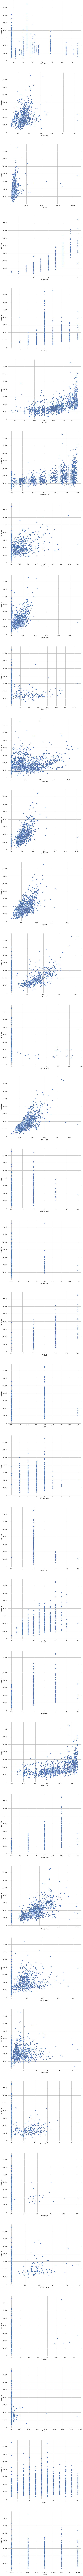

In [36]:
fig, ax = plt.subplots(len(train_num_columns)-1)
fig.set_size_inches(10, 360)

for i in range(len(train_num_columns)-1):
    sns.scatterplot(data=data_train_skip_columns.loc[:, train_num_columns], x=train_num_columns[i], y="SalePrice", ax=ax[i])

MSSubClass         0 0  +  
LotFrontage      259 227 +
LotArea            0 0 +
OverallQual        0 0 +
OverallCond        0 0 -
YearBuilt          0 0 +
YearRemodAdd       0 0 -
MasVnrArea         8 15 -
BsmtFinSF1         0 1 -
BsmtFinSF2         0 1 -
BsmtUnfSF          0 1 -
TotalBsmtSF        0 1 +
1stFlrSF           0 0 + их сложить вместе
2ndFlrSF           0 0 +
LowQualFinSF       0 0 -
GrLivArea          0 0 +
BsmtFullBath       0 2 -
BsmtHalfBath       0 2 -
FullBath           0 0 -
HalfBath           0 0 -
BedroomAbvGr       0 0 -
KitchenAbvGr       0 0 +, перевести в бинарный
TotRmsAbvGrd       0 0 +
Fireplaces         0 0 +, перевести в бинарный 
GarageYrBlt       81 78 + можно заменить на YearBuilt
GarageCars         0 1 +
GarageArea         0 1 +
WoodDeckSF         0 0 -
OpenPorchSF        0 0 +
EnclosedPorch      0 0 + 
3SsnPorch          0 0 + 
ScreenPorch        0 0 +
PoolArea           0 0 -
MiscVal            0 0 -
MoSold             0 0 -
YrSold             0 0 -

In [37]:
important_num_columns_2 = ["MSSubClass", "LotFrontage", "LotArea", "OverallQual", "YearBuilt", "TotalBsmtSF", "GrLivArea", "GarageYrBlt",
                           "GarageCars", "GarageArea", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch"]

to_binary_num_columns = ["KitchenAbvGr", "Fireplaces"]

#### object data

In [38]:
train_obj_columns = data_train_skip_columns.select_dtypes(include="object").columns.to_list()
test_obj_columns = train_obj_columns

In [39]:
data_train_skip_columns[train_obj_columns].isna().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [40]:
data_test_skip_columns[test_obj_columns].isna().sum()

MSZoning          4
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       16
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       1
Functional        2
GarageType       76
GarageFinish     78
GarageQual       78
GarageCond       78
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64

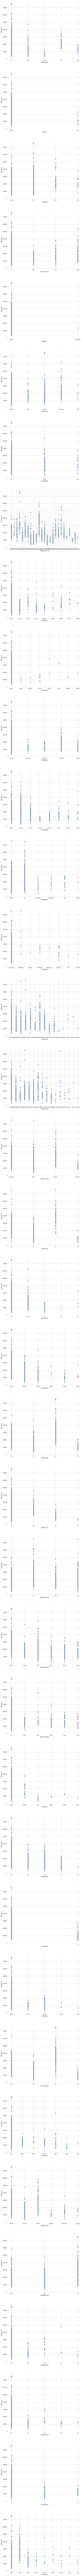

In [41]:
fig, ax = plt.subplots(len(train_obj_columns)-1)
fig.set_size_inches(10, 360)

for i in range(len(train_obj_columns)-1):
    sns.scatterplot(data=data_train_skip_columns.loc[:, train_obj_columns+["SalePrice"]], x=train_obj_columns[i], y="SalePrice", ax=ax[i])

MSZoning          0 4 +
Street            0 0 -, слишком дисбаланс
LotShape          0 0 +
LandContour       0 0 +
Utilities         0 2 -, явный дисбаланс
LotConfig         0 0 +
LandSlope         0 0 +
Neighborhood      0 0 +
Condition1        0 0 +, хочу оставить лишь его
Condition2        0 0 -
BldgType          0 0 +
HouseStyle        0 0 +
RoofStyle         0 0 +
RoofMatl          0 0 -
Exterior1st       0 1 +
Exterior2nd       0 1
MasVnrType        8 16
ExterQual         0 0 +
ExterCond         0 0 +
Foundation        0 0 +
BsmtQual         37 44
BsmtCond         37 45
BsmtExposure     38 44
BsmtFinType1     37 42
BsmtFinType2     38 42
Heating           0 0 -, явный дисбаланс
HeatingQC         0 0 +
CentralAir        0 0 +, в бинарный признак
Electrical        1 0 +
KitchenQual       0 1 +
Functional        0 2 +
GarageType       81 76 
GarageFinish     81 78
GarageQual       81 78
GarageCond       81 78
PavedDrive        0 0 +
SaleType          0 1 +
SaleCondition     0 0

In [42]:
important_cat_columns_2 = ["MSZoning", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1",
                           "BldgType", "HouseStyle", "RoofStyle", "Exterior1st", "ExterQual", "ExterCond", "Foundation", 
                           "HeatingQC", "Electrical", "KitchenQual", "Functional", "PavedDrive", "SaleType"]

to_binary_cat_columns = ["CentralAir"]

<font color="green" size=3>1.3) Выводы</font>

In [43]:
all_important_num_columns = list(set(important_num_columns_1 + important_num_columns_2))
all_important_cat_columns = list(set(important_cat_columns_1 + important_cat_columns_2))

In [44]:
all_important_num_columns

['ScreenPorch',
 'OverallQual',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'GarageYrBlt',
 'EnclosedPorch',
 'LotFrontage',
 'GrLivArea',
 'YearBuilt',
 '3SsnPorch',
 'LotArea',
 'TotRmsAbvGrd',
 'MSSubClass',
 'LowQualFinSF']

In [45]:
all_important_cat_columns

['ExterQual',
 'BsmtExposure',
 'Foundation',
 'SaleType',
 'LandSlope',
 'Electrical',
 'ExterCond',
 'Functional',
 'RoofStyle',
 'Neighborhood',
 'PavedDrive',
 'LandContour',
 'HouseStyle',
 'BsmtQual',
 'Exterior1st',
 'BldgType',
 'Condition1',
 'KitchenQual',
 'HeatingQC',
 'GarageFinish',
 'LotShape',
 'Street',
 'MSZoning',
 'LotConfig']

<font color="green" size=3>1.4)</font>
Сформулировать гипотезы о том, какие сочетания признаков могут быть полезны. Добавить их (если придумаете). Подсказка: отрисуйте выборку на карте, посчитайте расстояние до важных объектов в этом городе, посчитайте статистики по районам и по ближайшим объектам (не забудьте, что эти статистики нужно считать по обучающей выборке!). 

In [46]:
# во первых "сконкатенируем" concat_num_columns

In [47]:
concat_num_columns

['1stFlrSF', '2ndFlrSF']

In [48]:
data_train_skip_columns["1stFlrSF+2ndFlrSF"] = data_train_skip_columns["1stFlrSF"] + data_train_skip_columns["2ndFlrSF"]
data_test_skip_columns["1stFlrSF+2ndFlrSF"] = data_test_skip_columns["1stFlrSF"] + data_test_skip_columns["2ndFlrSF"]

In [49]:
new_columns = ["1stFlrSF+2ndFlrSF"]

In [50]:
# конкатенировать данные столбцы не буду, так как визуально мне эта затея не нравится, Condition1 - OneHotEncoding
concat_cat_columns

['Condition1', 'Condition2']

In [51]:
# бинаризуем to_binary_num_columns

In [52]:
to_binary_num_columns

['KitchenAbvGr', 'Fireplaces']

In [53]:
data_train_skip_columns["KitchenAbvGr_binary"] = data_train_skip_columns["KitchenAbvGr"].apply(lambda x: x if x == 1 else 0)
data_test_skip_columns["KitchenAbvGr_binary"] = data_test_skip_columns["KitchenAbvGr"].apply(lambda x: x if x == 1 else 0)
new_columns += ["KitchenAbvGr_binary"]

In [54]:
data_train_skip_columns["has_Fireplaces"] = data_train_skip_columns["Fireplaces"].apply(lambda x: x if x == 0 else 1)
data_test_skip_columns["has_Fireplaces"] = data_test_skip_columns["Fireplaces"].apply(lambda x: x if x == 0 else 1)
new_columns += ["has_Fireplaces"]

In [55]:
to_binary_cat_columns

['CentralAir']

In [56]:
data_train_skip_columns["has_CentralAir"] = data_train_skip_columns["CentralAir"].apply(lambda x: 1 if x == "Y" else 0)
data_test_skip_columns["has_CentralAir"] = data_test_skip_columns["CentralAir"].apply(lambda x: 1 if x == "Y" else 0)
new_columns += ["has_CentralAir"]

In [57]:
# прежде чем создать новые признаки, заполним все пропуски в data_train_skip_columns и data_test_skip_columns

In [58]:
data_train_skip_columns[all_important_num_columns + all_important_cat_columns].isna().sum()

ScreenPorch        0
OverallQual        0
TotalBsmtSF        0
GarageCars         0
GarageArea         0
OpenPorchSF        0
GarageYrBlt       81
EnclosedPorch      0
LotFrontage      259
GrLivArea          0
YearBuilt          0
3SsnPorch          0
LotArea            0
TotRmsAbvGrd       0
MSSubClass         0
LowQualFinSF       0
ExterQual          0
BsmtExposure      38
Foundation         0
SaleType           0
LandSlope          0
Electrical         1
ExterCond          0
Functional         0
RoofStyle          0
Neighborhood       0
PavedDrive         0
LandContour        0
HouseStyle         0
BsmtQual          37
Exterior1st        0
BldgType           0
Condition1         0
KitchenQual        0
HeatingQC          0
GarageFinish      81
LotShape           0
Street             0
MSZoning           0
LotConfig          0
dtype: int64

In [59]:
data_test_skip_columns[all_important_num_columns + all_important_cat_columns].isna().sum()

ScreenPorch        0
OverallQual        0
TotalBsmtSF        1
GarageCars         1
GarageArea         1
OpenPorchSF        0
GarageYrBlt       78
EnclosedPorch      0
LotFrontage      227
GrLivArea          0
YearBuilt          0
3SsnPorch          0
LotArea            0
TotRmsAbvGrd       0
MSSubClass         0
LowQualFinSF       0
ExterQual          0
BsmtExposure      44
Foundation         0
SaleType           1
LandSlope          0
Electrical         0
ExterCond          0
Functional         2
RoofStyle          0
Neighborhood       0
PavedDrive         0
LandContour        0
HouseStyle         0
BsmtQual          44
Exterior1st        1
BldgType           0
Condition1         0
KitchenQual        1
HeatingQC          0
GarageFinish      78
LotShape           0
Street             0
MSZoning           4
LotConfig          0
dtype: int64

In [60]:
median_TotalBsmtSF = data_train_skip_columns["TotalBsmtSF"].median()
median_GarageCars = data_train_skip_columns["GarageCars"].median()
median_LotFrontage = data_train_skip_columns["LotFrontage"].median()
mode_BsmtExposure = data_train_skip_columns["BsmtExposure"].mode().item()
mode_Exterior1st = data_train_skip_columns["Exterior1st"].mode().item()
mode_GarageFinish = data_train_skip_columns["GarageFinish"].mode().item()
mode_KitchenQual = data_train_skip_columns["KitchenQual"].mode().item()
mode_MSZoning = data_train_skip_columns["MSZoning"].mode().item()
mode_BsmtQual = data_train_skip_columns["BsmtQual"].mode().item()
mode_Functional = data_train_skip_columns["Functional"].mode().item()
mode_SaleType = data_train_skip_columns["SaleType"].mode().item()
mode_Electrical = data_train_skip_columns["Electrical"].mode().item()
median_GarageArea = data_train_skip_columns["GarageArea"].median()

In [61]:
data_train_skip_columns["TotalBsmtSF"].fillna(value=median_TotalBsmtSF, inplace=True)
data_test_skip_columns["TotalBsmtSF"].fillna(value=median_TotalBsmtSF, inplace=True)

data_train_skip_columns["GarageCars"].fillna(value=median_GarageCars, inplace=True)
data_test_skip_columns["GarageCars"].fillna(value=median_GarageCars, inplace=True)

data_train_skip_columns["LotFrontage"].fillna(value=median_LotFrontage, inplace=True)
data_test_skip_columns["LotFrontage"].fillna(value=median_LotFrontage, inplace=True)

data_train_skip_columns["BsmtExposure"].fillna(value=mode_BsmtExposure, inplace=True)
data_test_skip_columns["BsmtExposure"].fillna(value=mode_BsmtExposure, inplace=True)

data_train_skip_columns["Exterior1st"].fillna(value=mode_Exterior1st, inplace=True)
data_test_skip_columns["Exterior1st"].fillna(value=mode_Exterior1st, inplace=True)

data_train_skip_columns["GarageFinish"].fillna(value=mode_GarageFinish, inplace=True)
data_test_skip_columns["GarageFinish"].fillna(value=mode_GarageFinish, inplace=True)

data_train_skip_columns["KitchenQual"].fillna(value=mode_KitchenQual, inplace=True)
data_test_skip_columns["KitchenQual"].fillna(value=mode_KitchenQual, inplace=True)

data_train_skip_columns["MSZoning"].fillna(value=mode_KitchenQual, inplace=True)
data_test_skip_columns["MSZoning"].fillna(value=mode_KitchenQual, inplace=True)

data_train_skip_columns["BsmtQual"].fillna(value=mode_BsmtQual, inplace=True)
data_test_skip_columns["BsmtQual"].fillna(value=mode_BsmtQual, inplace=True)

data_train_skip_columns["Functional"].fillna(value=mode_Functional, inplace=True)
data_test_skip_columns["Functional"].fillna(value=mode_Functional, inplace=True)

data_train_skip_columns["SaleType"].fillna(value=mode_SaleType, inplace=True)
data_test_skip_columns["SaleType"].fillna(value=mode_SaleType, inplace=True)

data_train_skip_columns["Electrical"].fillna(value=mode_Electrical, inplace=True)
data_test_skip_columns["Electrical"].fillna(value=mode_Electrical, inplace=True)

data_train_skip_columns["GarageArea"].fillna(value=median_GarageArea, inplace=True)
data_test_skip_columns["GarageArea"].fillna(value=median_GarageArea, inplace=True)

In [62]:
# GarageYrBlt - пропуски заполним YearBuilt так как гаражи очевидно строятся либо в момент постройки дома, либо чутка позже

In [63]:
data_train_skip_columns["GarageYrBlt"].fillna(value=0, inplace=True)
data_test_skip_columns["GarageYrBlt"].fillna(value=0, inplace=True)

In [64]:
data_train_skip_columns["GarageYrBlt"] = data_train_skip_columns[["GarageYrBlt", "YearBuilt"]].max(axis=1)
data_test_skip_columns["GarageYrBlt"] = data_test_skip_columns[["GarageYrBlt", "YearBuilt"]].max(axis=1)

In [65]:
data_train_skip_columns[all_important_num_columns + all_important_cat_columns].isna().sum()

ScreenPorch      0
OverallQual      0
TotalBsmtSF      0
GarageCars       0
GarageArea       0
OpenPorchSF      0
GarageYrBlt      0
EnclosedPorch    0
LotFrontage      0
GrLivArea        0
YearBuilt        0
3SsnPorch        0
LotArea          0
TotRmsAbvGrd     0
MSSubClass       0
LowQualFinSF     0
ExterQual        0
BsmtExposure     0
Foundation       0
SaleType         0
LandSlope        0
Electrical       0
ExterCond        0
Functional       0
RoofStyle        0
Neighborhood     0
PavedDrive       0
LandContour      0
HouseStyle       0
BsmtQual         0
Exterior1st      0
BldgType         0
Condition1       0
KitchenQual      0
HeatingQC        0
GarageFinish     0
LotShape         0
Street           0
MSZoning         0
LotConfig        0
dtype: int64

In [66]:
data_test_skip_columns[all_important_num_columns + all_important_cat_columns].isna().sum()

ScreenPorch      0
OverallQual      0
TotalBsmtSF      0
GarageCars       0
GarageArea       0
OpenPorchSF      0
GarageYrBlt      0
EnclosedPorch    0
LotFrontage      0
GrLivArea        0
YearBuilt        0
3SsnPorch        0
LotArea          0
TotRmsAbvGrd     0
MSSubClass       0
LowQualFinSF     0
ExterQual        0
BsmtExposure     0
Foundation       0
SaleType         0
LandSlope        0
Electrical       0
ExterCond        0
Functional       0
RoofStyle        0
Neighborhood     0
PavedDrive       0
LandContour      0
HouseStyle       0
BsmtQual         0
Exterior1st      0
BldgType         0
Condition1       0
KitchenQual      0
HeatingQC        0
GarageFinish     0
LotShape         0
Street           0
MSZoning         0
LotConfig        0
dtype: int64

In [67]:
# создадим несколько новых фичей, которые из логики могут быть полезны

In [68]:
data_train_skip_columns["Years"] = 2016 - data_train_skip_columns["YearRemodAdd"]
data_test_skip_columns["Years"] = 2016 - data_test_skip_columns["YearRemodAdd"]
new_columns += ["Years"]

In [69]:
data_train_skip_columns["has_pool"] = data_train_skip_columns["PoolArea"].apply(lambda x: x if x == 0 else 1)
data_test_skip_columns["has_pool"] = data_test_skip_columns["PoolArea"].apply(lambda x: x if x == 0 else 1)
new_columns += ["has_pool"]

In [70]:
data_train_skip_columns["OverallQual+Cond"] = data_train_skip_columns["OverallQual"] + data_train_skip_columns["OverallCond"]
data_test_skip_columns["OverallQual+Cond"] = data_test_skip_columns["OverallQual"] + data_test_skip_columns["OverallCond"]
new_columns += ["OverallQual+Cond"]

In [71]:
data_train_skip_columns["All_number_of_Bath"] = data_train_skip_columns['FullBath'] + 0.5*data_train_skip_columns['HalfBath']\
                                              + data_train_skip_columns['BsmtFullBath'] + 0.5*data_train_skip_columns['BsmtHalfBath']

data_test_skip_columns["All_number_of_Bath"] = data_test_skip_columns['FullBath'] + 0.5*data_test_skip_columns['HalfBath']\
                                             + data_test_skip_columns['BsmtFullBath'] + 0.5*data_test_skip_columns['BsmtHalfBath']

new_columns += ["All_number_of_Bath"]

In [72]:
data_train_skip_columns[new_columns].isna().sum()

1stFlrSF+2ndFlrSF      0
KitchenAbvGr_binary    0
has_Fireplaces         0
has_CentralAir         0
Years                  0
has_pool               0
OverallQual+Cond       0
All_number_of_Bath     0
dtype: int64

In [73]:
data_test_skip_columns[new_columns].isna().sum()

1stFlrSF+2ndFlrSF      0
KitchenAbvGr_binary    0
has_Fireplaces         0
has_CentralAir         0
Years                  0
has_pool               0
OverallQual+Cond       0
All_number_of_Bath     2
dtype: int64

In [74]:
mode_All_number_of_Bath = data_train_skip_columns["All_number_of_Bath"].mode().item()

In [75]:
data_test_skip_columns["All_number_of_Bath"].fillna(value=mode_All_number_of_Bath, inplace=True)

<font color="green" size=3>1.5)</font>
Исследовать зависимость целевой переменной от признаков, отобранных на предыдущем шаге, используя корреляционный анализ. Использовать scipy.stats.spearmanr для вещественных признаков, scipy.stats.pointbiserialr для бинарных признаков, scipy.stats.chisquare для прочих категориальных признаков (основная гипотеза -- равномерное распределение целевой переменной по значениям категориального признака). Выводы делать на основании p-value.

In [76]:
# рассмотрим для начала числовые признаки
all_important_num_columns + new_columns + ["SalePrice"]

['ScreenPorch',
 'OverallQual',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'GarageYrBlt',
 'EnclosedPorch',
 'LotFrontage',
 'GrLivArea',
 'YearBuilt',
 '3SsnPorch',
 'LotArea',
 'TotRmsAbvGrd',
 'MSSubClass',
 'LowQualFinSF',
 '1stFlrSF+2ndFlrSF',
 'KitchenAbvGr_binary',
 'has_Fireplaces',
 'has_CentralAir',
 'Years',
 'has_pool',
 'OverallQual+Cond',
 'All_number_of_Bath',
 'SalePrice']

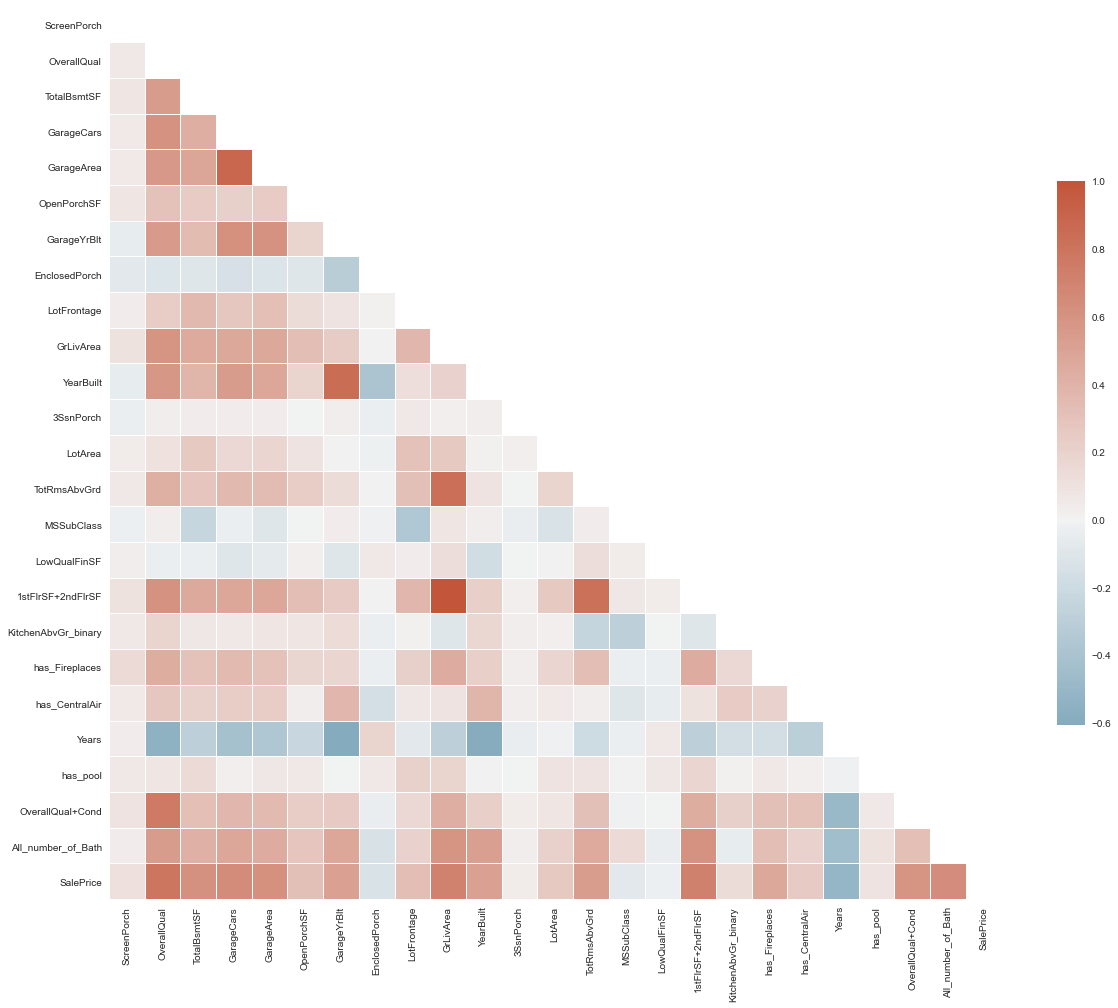

In [77]:
corr = data_train_skip_columns[all_important_num_columns + new_columns + ["SalePrice"]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### 3SsnPorch

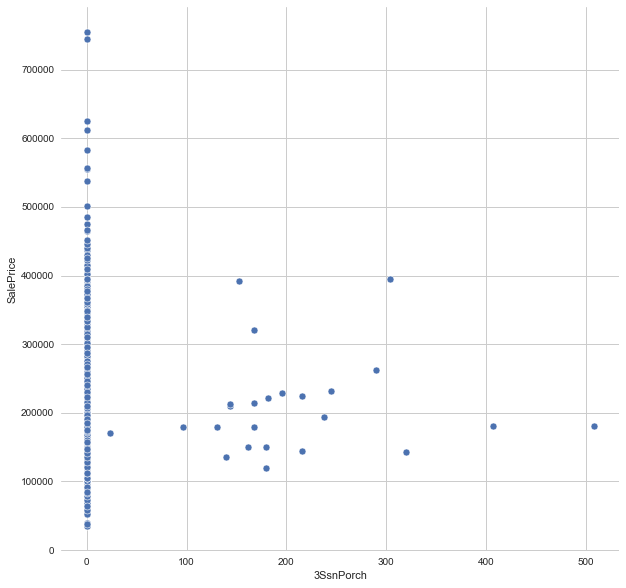

In [78]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_train_skip_columns, x="3SsnPorch", y="SalePrice");

In [79]:
sp.stats.spearmanr(a=data_train_skip_columns["3SsnPorch"].values, b=data_train_skip_columns["SalePrice"].values)
# не отклоняем нулевую гипотезе о некоррелируемости 2х величин

SpearmanrResult(correlation=0.06544021620062833, pvalue=0.012384087320432495)

#### LotArea

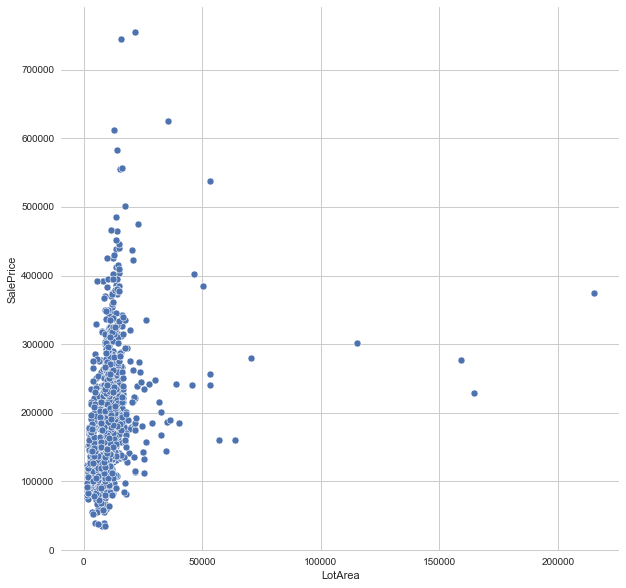

In [80]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_train_skip_columns, x="LotArea", y="SalePrice");

In [81]:
sp.stats.spearmanr(a=data_train_skip_columns["LotArea"].values, b=data_train_skip_columns["SalePrice"].values)
# отклоняем нулевую гипотезе о некоррелируемости 2х величин

SpearmanrResult(correlation=0.4564605833912115, pvalue=4.8715809571702074e-76)

#### OpenPorchSF

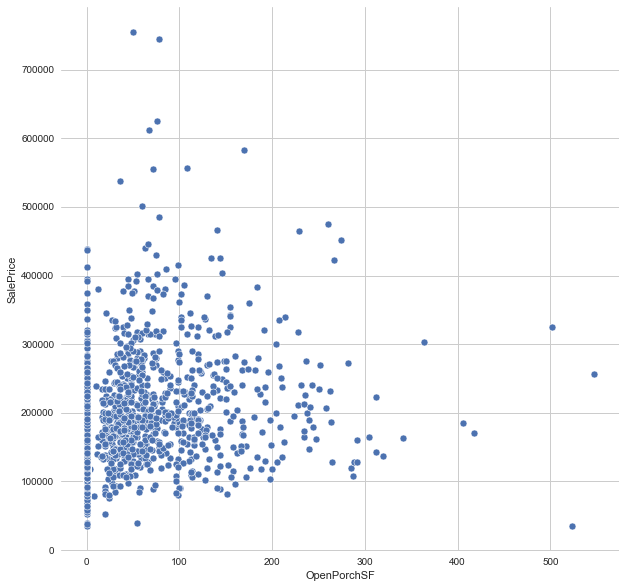

In [82]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_train_skip_columns, x="OpenPorchSF", y="SalePrice");

In [83]:
sp.stats.spearmanr(a=data_train_skip_columns["OpenPorchSF"].values, b=data_train_skip_columns["SalePrice"].values)
# отклоняем нулевую гипотезе о некоррелируемости 2х величин

SpearmanrResult(correlation=0.47756066228252647, pvalue=4.860098096441017e-84)

####  TotalBsmtSF

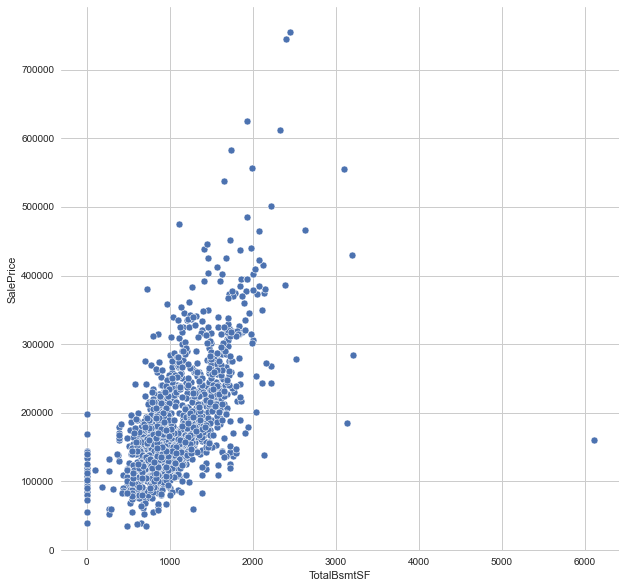

In [84]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_train_skip_columns, x="TotalBsmtSF", y="SalePrice");

In [85]:
sp.stats.spearmanr(a=data_train_skip_columns["TotalBsmtSF"].values, b=data_train_skip_columns["SalePrice"].values)
# отклоняем нулевую гипотезе о некоррелируемости 2х величин

SpearmanrResult(correlation=0.6027254448924096, pvalue=4.157299803636561e-145)

#### LotFrontage

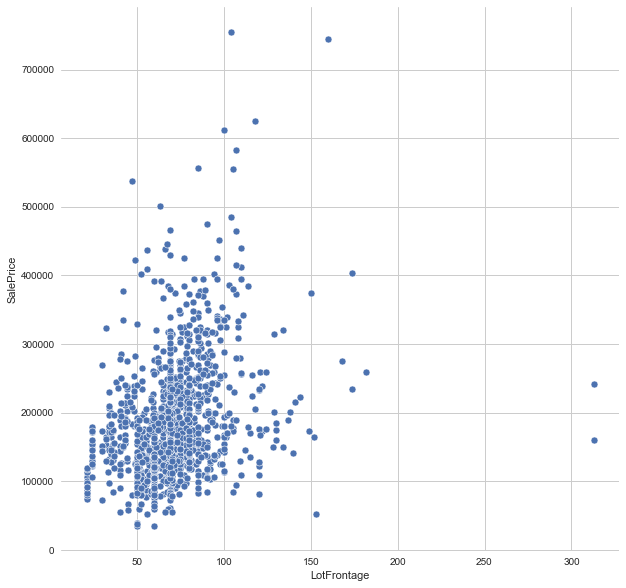

In [86]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_train_skip_columns, x="LotFrontage", y="SalePrice");

In [87]:
sp.stats.spearmanr(a=data_train_skip_columns["LotFrontage"].values, b=data_train_skip_columns["SalePrice"].values)
# отклоняем нулевую гипотезе о некоррелируемости 2х величин

SpearmanrResult(correlation=0.3755897922087816, pvalue=3.976917882625288e-50)

#### GarageCars

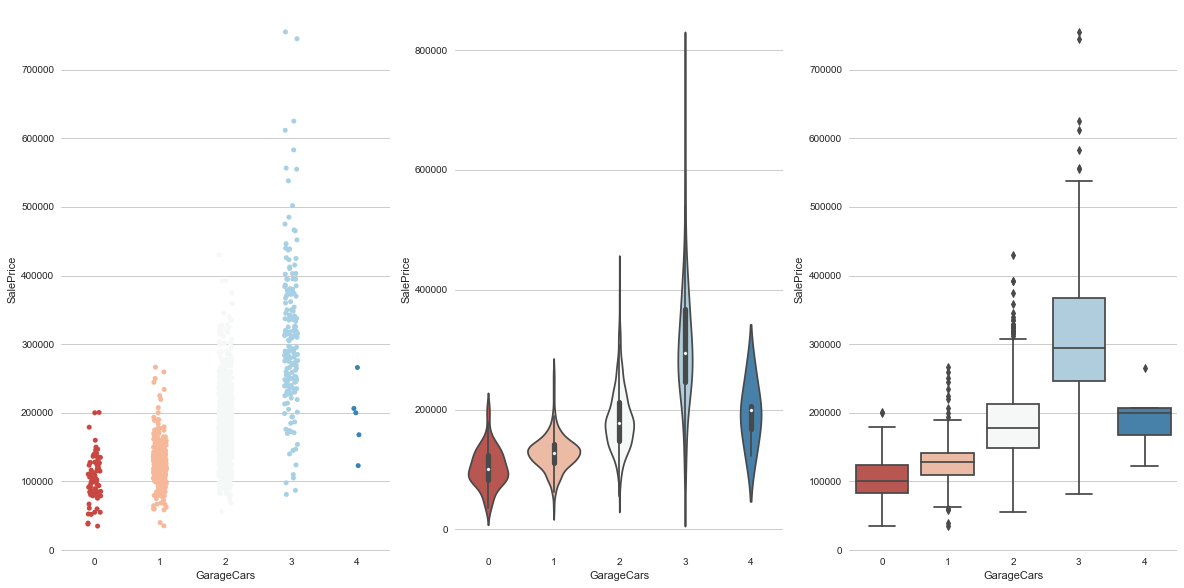

In [88]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'GarageCars', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'GarageCars', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'GarageCars', y='SalePrice', palette="RdBu", ax = ax[2]);

In [89]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="GarageCars", categories=[0, 1, 2, 3, 4])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной 

0 : Power_divergenceResult(statistic=2.502074444213442, pvalue=0.9808276508437933)
1 : Power_divergenceResult(statistic=0.5532771793670795, pvalue=0.9999530280609794)
2 : Power_divergenceResult(statistic=0.13582404443398516, pvalue=0.9999998998167954)
3 : Power_divergenceResult(statistic=2.900194422059365, pvalue=0.9681206619444579)
4 : Power_divergenceResult(statistic=0.3819642529740091, pvalue=0.999990495446985)


#### EnclosedPorch

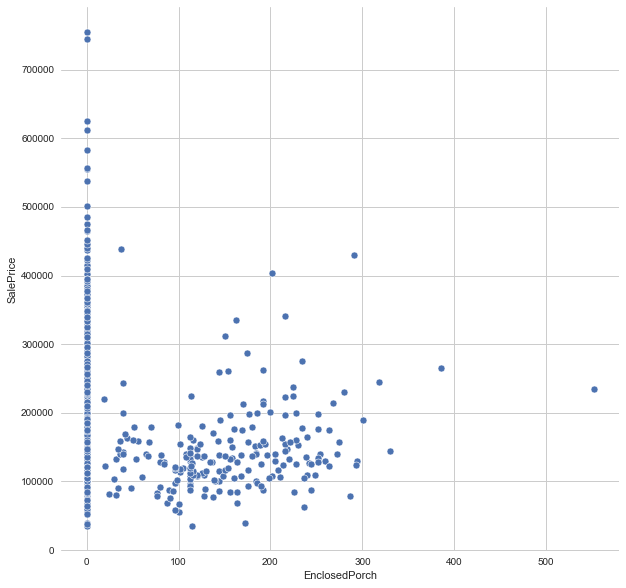

In [90]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_train_skip_columns, x="EnclosedPorch", y="SalePrice");

In [91]:
sp.stats.spearmanr(a=data_train_skip_columns["EnclosedPorch"].values, b=data_train_skip_columns["SalePrice"].values)
# отклоняем нулевую гипотезе о некоррелируемости 2х величин

SpearmanrResult(correlation=-0.2183936205521982, pvalue=3.180474171341712e-17)

#### TotRmsAbvGrd

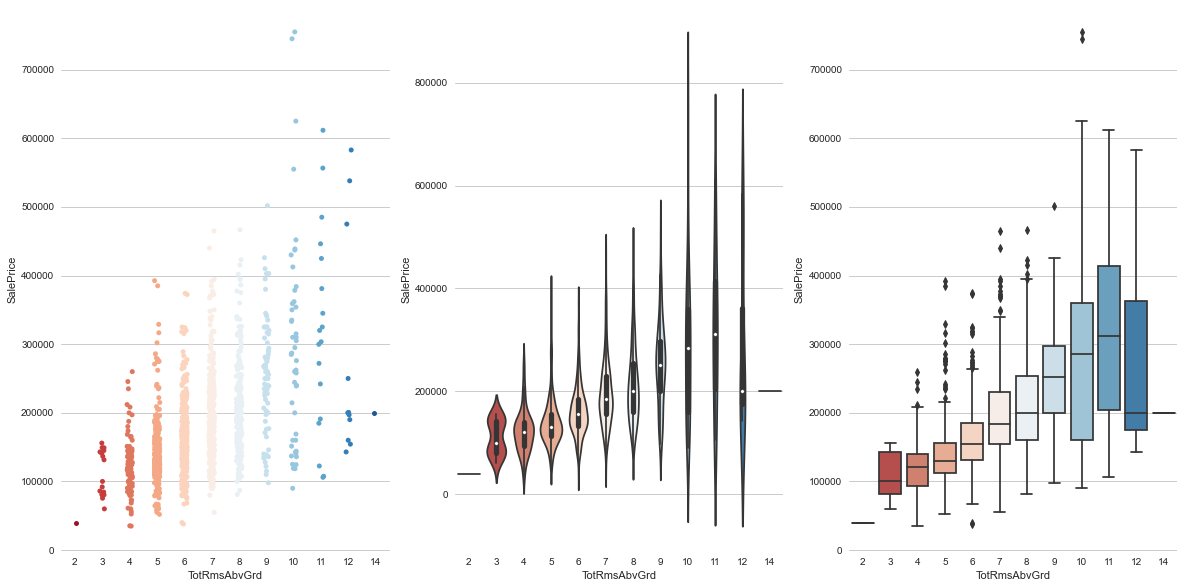

In [92]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'TotRmsAbvGrd', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'TotRmsAbvGrd', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'TotRmsAbvGrd', y='SalePrice', palette="RdBu", ax = ax[2]);

In [93]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="TotRmsAbvGrd", categories=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной 

2 : Power_divergenceResult(statistic=8.864864864864863, pvalue=0.44984083686890985)
3 : Power_divergenceResult(statistic=2.2120876637667974, pvalue=0.9876525003144948)
4 : Power_divergenceResult(statistic=0.7744362395331519, pvalue=0.9998049641302909)
5 : Power_divergenceResult(statistic=0.26486799299485186, pvalue=0.9999980805769)
6 : Power_divergenceResult(statistic=0.0965181062239804, pvalue=0.999999978116769)
7 : Power_divergenceResult(statistic=0.1572983047808591, pvalue=0.999999807756895)
8 : Power_divergenceResult(statistic=0.2887565641938818, pvalue=0.9999971964785075)
9 : Power_divergenceResult(statistic=1.2289654682372295, pvalue=0.9987027176437613)
10 : Power_divergenceResult(statistic=3.367343287517204, pvalue=0.9479362069790414)
11 : Power_divergenceResult(statistic=6.323732671390962, pvalue=0.7071312723606116)
12 : Power_divergenceResult(statistic=16.04707577196385, pvalue=0.06590500682461557)
14 : Power_divergenceResult(statistic=2.914209115281502, pvalue=0.9675992548713

In [94]:
# также по аналогии просматриваем остальные ... но остановимся поподробнее ещё на новых признаказ
new_columns

['1stFlrSF+2ndFlrSF',
 'KitchenAbvGr_binary',
 'has_Fireplaces',
 'has_CentralAir',
 'Years',
 'has_pool',
 'OverallQual+Cond',
 'All_number_of_Bath']

#### 1stFlrSF+2ndFlrSF

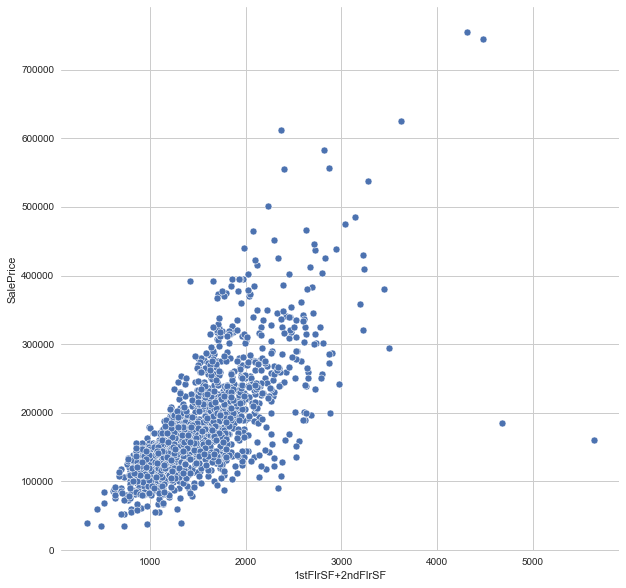

In [95]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_train_skip_columns, x="1stFlrSF+2ndFlrSF", y="SalePrice");

In [96]:
sp.stats.spearmanr(a=data_train_skip_columns["1stFlrSF+2ndFlrSF"].values, b=data_train_skip_columns["SalePrice"].values)
# отклоняем нулевую гипотезе о некоррелируемости 2х величин

SpearmanrResult(correlation=0.7380463287908625, pvalue=2.1980160159092437e-251)

#### KitchenAbvGr_binary

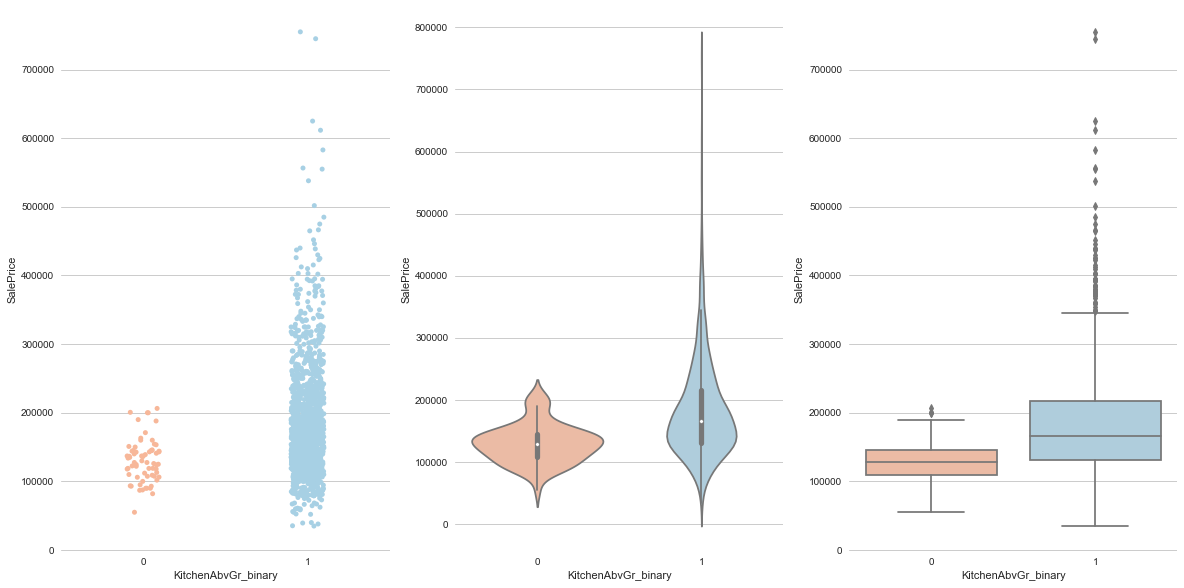

In [97]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'KitchenAbvGr_binary', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'KitchenAbvGr_binary', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'KitchenAbvGr_binary', y='SalePrice', palette="RdBu", ax = ax[2]);

In [98]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="KitchenAbvGr_binary", categories=[0, 1])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной 

0 : Power_divergenceResult(statistic=0.4751904570131536, pvalue=0.9999755503783684)
1 : Power_divergenceResult(statistic=0.0011339843611837875, pvalue=1.0)


#### has_Fireplaces

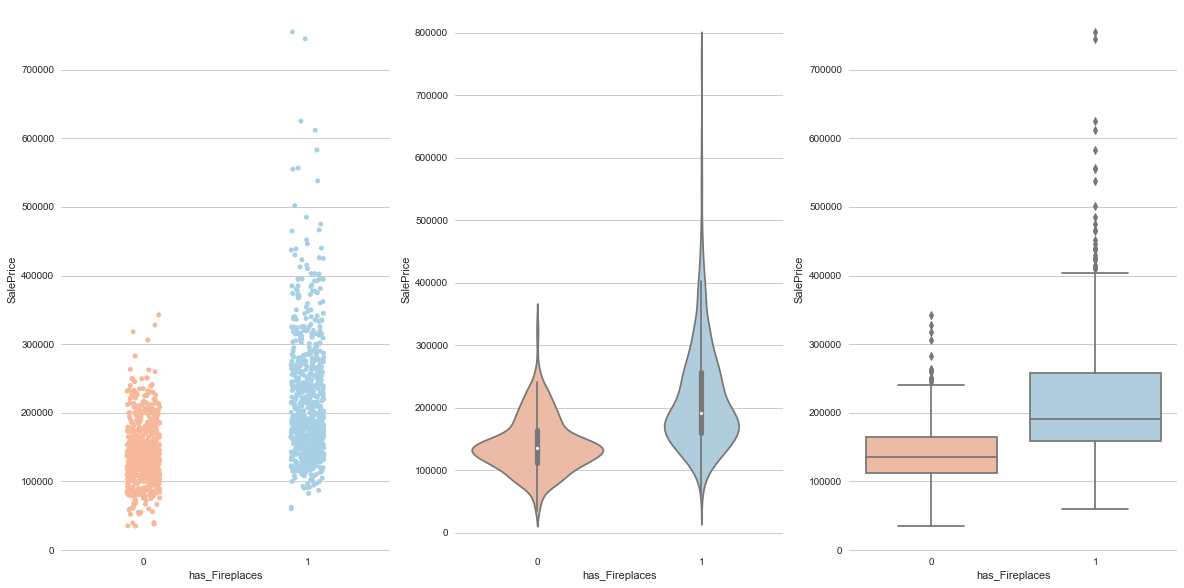

In [99]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'has_Fireplaces', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'has_Fireplaces', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'has_Fireplaces', y='SalePrice', palette="RdBu", ax = ax[2]);

In [100]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="has_Fireplaces", categories=[0, 1])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной 

0 : Power_divergenceResult(statistic=0.2546566409604009, pvalue=0.9999983851093238)
1 : Power_divergenceResult(statistic=0.20448984105455703, pvalue=0.9999993858811203)


#### has_CentralAir

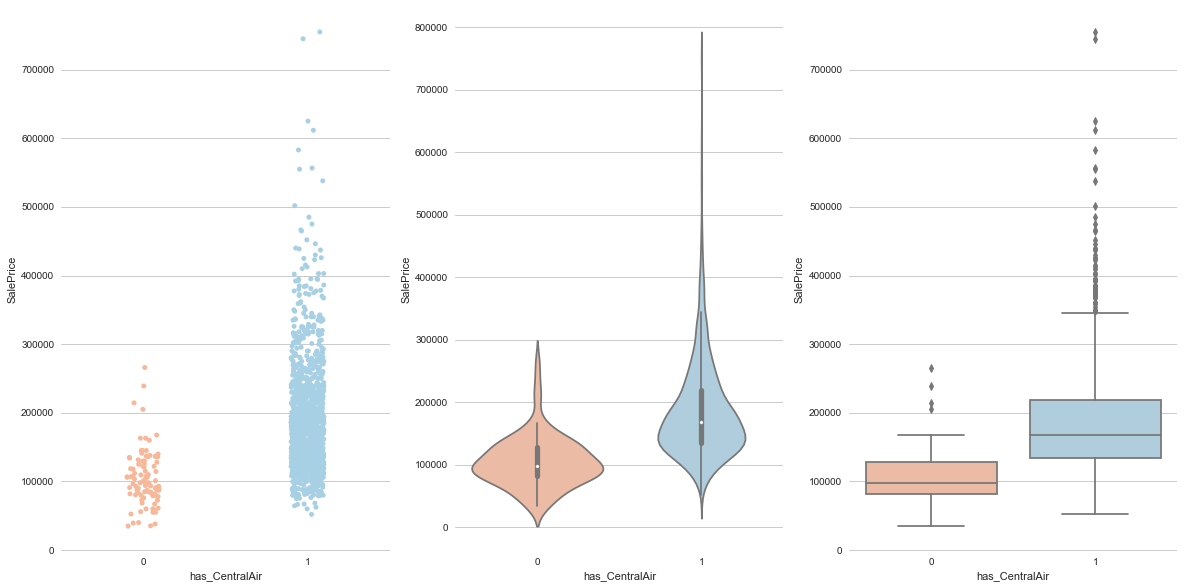

In [101]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'has_CentralAir', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'has_CentralAir', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'has_CentralAir', y='SalePrice', palette="RdBu", ax = ax[2]);

In [102]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="has_CentralAir", categories=[0, 1])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной 

0 : Power_divergenceResult(statistic=2.601590509557142, pvalue=0.9780253616638519)
1 : Power_divergenceResult(statistic=0.012601459484900221, pvalue=0.9999999999976222)


#### Years

In [103]:
data_train_skip_columns

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1             60       RL         65.0     8450   Pave      Reg         Lvl   
2             20       RL         80.0     9600   Pave      Reg         Lvl   
3             60       RL         68.0    11250   Pave      IR1         Lvl   
4             70       RL         60.0     9550   Pave      IR1         Lvl   
5             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1456          60       RL         62.0     7917   Pave      Reg         Lvl   
1457          20       RL         85.0    13175   Pave      Reg         Lvl   
1458          70       RL         66.0     9042   Pave      Reg         Lvl   
1459          20       RL         68.0     9717   Pave      Reg         Lvl   
1460          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
Id                                                                      
1       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
2       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
3       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
4       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
5       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1456    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1457    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1458    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1459    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1460    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                            
1        1Fam     2Story            7            5       2003          2003   
2        1Fam     1Story            6            8       1976          1976   
3        1Fam     2Story            7            5       2001          2002   
4        1Fam     2Story            7            5       1915          1970   
5        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1456     1Fam     2Story            6            5       1999          2000   
1457     1Fam     1Story            6            6       1978          1988   
1458     1Fam     2Story            7            9       1941          2006   
1459     1Fam     1Story            5            6       1950          1996   
1460     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
Id                                                                       
1        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
2        Gable  CompShg     MetalSd     MetalSd       None         0.0   
3        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
4        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
5        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
1456     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1457     Gable  CompShg     Plywood     Plywood      Stone       119.0   
1458     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1459       Hip  CompShg     MetalSd     MetalSd       None         0.0   
1460     Gable  CompShg     HdBoard     HdBoard       None         0.0   

     ExterQual ExterCond Foundation B

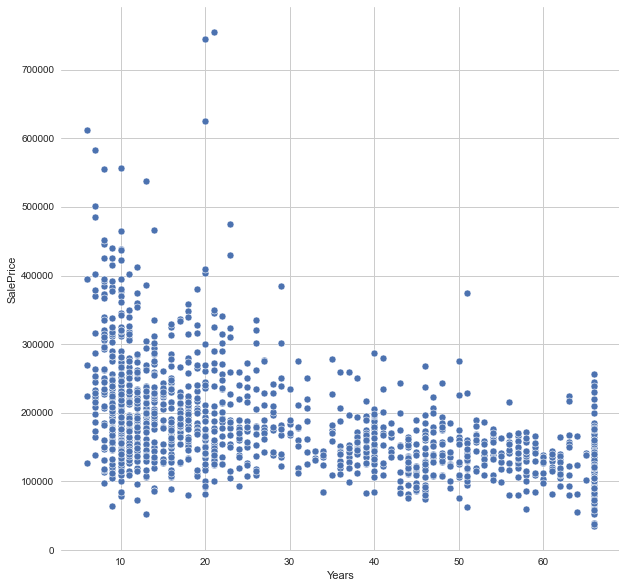

In [104]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_train_skip_columns, x="Years", y="SalePrice");

In [105]:
sp.stats.spearmanr(a=data_train_skip_columns["Years"].values, b=data_train_skip_columns["SalePrice"].values)
# отклоняем нулевую гипотезе о некоррелируемости 2х величин

SpearmanrResult(correlation=-0.5711589780582343, pvalue=3.557233443898463e-127)

#### has_pool

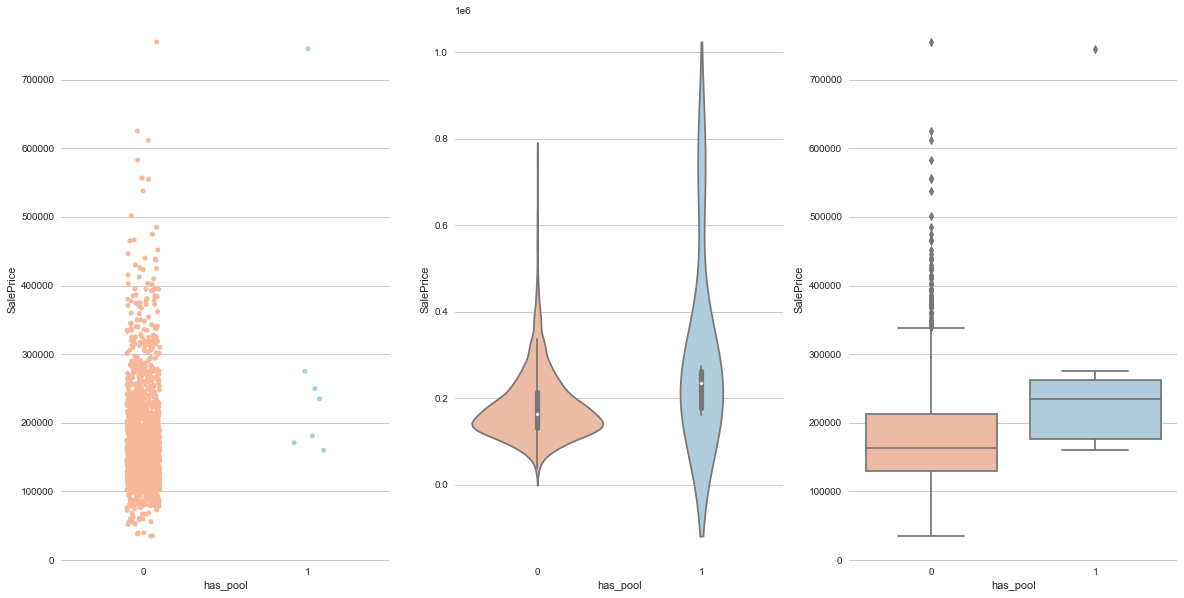

In [106]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'has_pool', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'has_pool', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'has_pool', y='SalePrice', palette="RdBu", ax = ax[2]);

In [107]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="has_pool", categories=[0, 1])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной 

0 : Power_divergenceResult(statistic=0.0003481986633728625, pvalue=1.0)
1 : Power_divergenceResult(statistic=15.0024520796073, pvalue=0.09086864417345379)


#### OverallQual+Cond

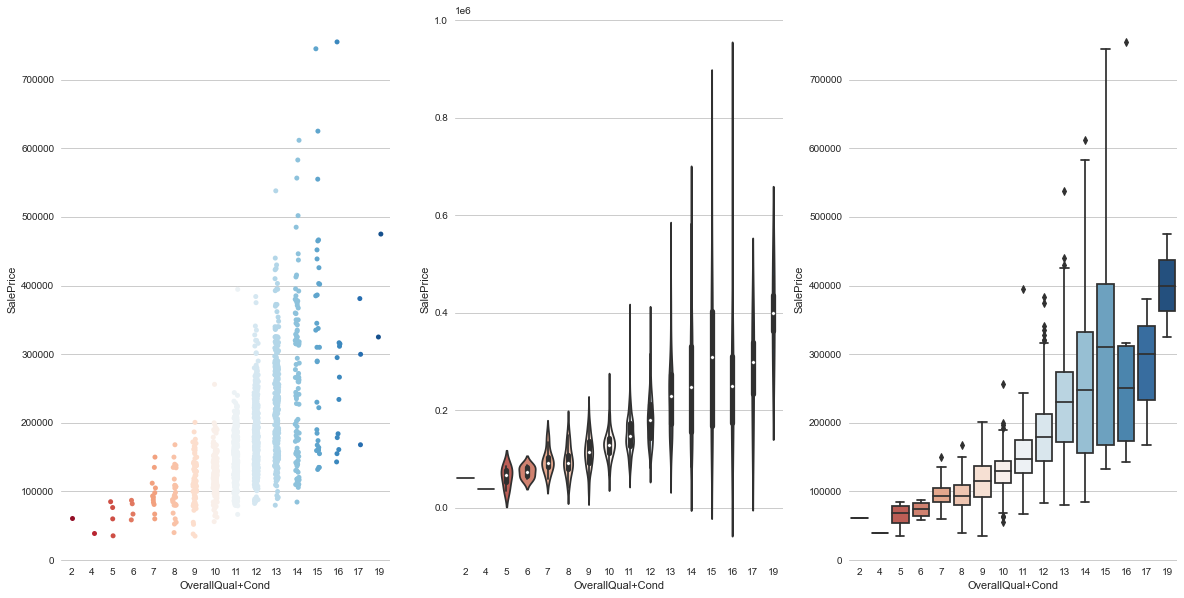

In [108]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'OverallQual+Cond', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'OverallQual+Cond', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'OverallQual+Cond', y='SalePrice', palette="RdBu", ax = ax[2]);

In [109]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="OverallQual+Cond", categories=[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19])
# по стат. критерию можем отклонить гипотезу о независимости целевой переменной и категориальной !

2 : Power_divergenceResult(statistic=8.864864864864863, pvalue=0.44984083686890985)
4 : Power_divergenceResult(statistic=8.864864864864863, pvalue=0.44984083686890985)
5 : Power_divergenceResult(statistic=8.864864864864863, pvalue=0.44984083686890985)
6 : Power_divergenceResult(statistic=8.864864864864863, pvalue=0.44984083686890985)
7 : Power_divergenceResult(statistic=4.944738226895903, pvalue=0.8390987021569577)
8 : Power_divergenceResult(statistic=3.091033568882997, pvalue=0.9605760523023541)
9 : Power_divergenceResult(statistic=0.9627630874296386, pvalue=0.9995186300787485)
10 : Power_divergenceResult(statistic=0.5066350100953101, pvalue=0.9999677931408139)
11 : Power_divergenceResult(statistic=0.2325148070622188, pvalue=0.9999989178345242)
12 : Power_divergenceResult(statistic=0.20300108695629004, pvalue=0.9999994053848004)
13 : Power_divergenceResult(statistic=0.6002863057623977, pvalue=0.9999334839937972)
14 : Power_divergenceResult(statistic=1.4140913235935173, pvalue=0.997735

#### All_number_of_Bath

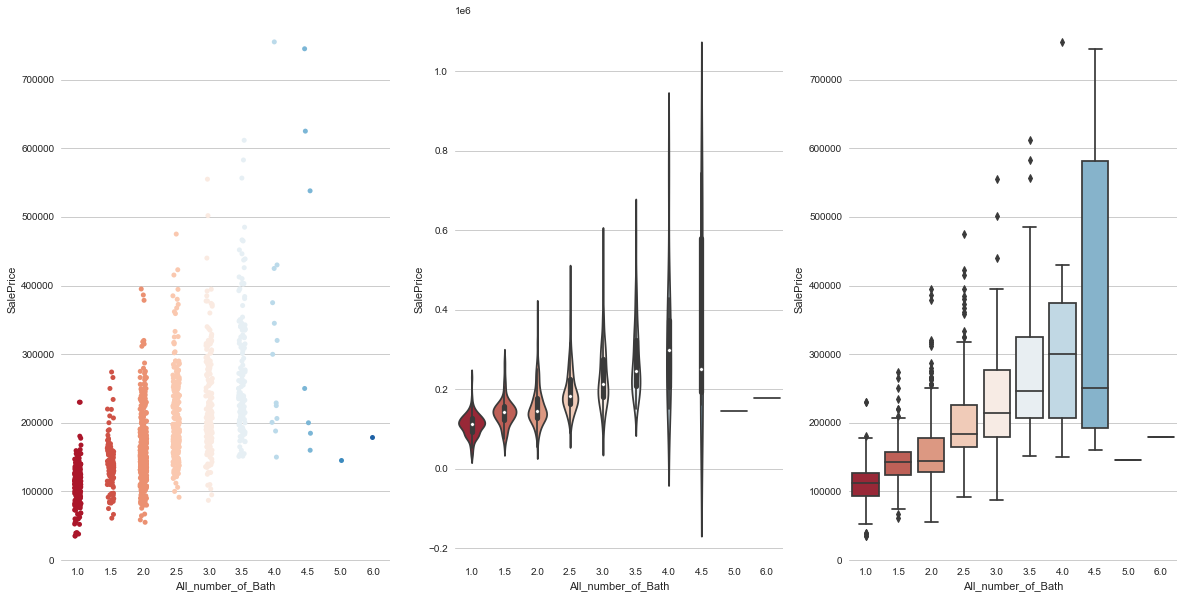

In [110]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'All_number_of_Bath', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'All_number_of_Bath', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'All_number_of_Bath', y='SalePrice', palette="RdBu", ax = ax[2]);

In [111]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="All_number_of_Bath", categories=[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 6.0])
# по стат. критерию можем отклонить гипотезу о независимости целевой переменной и категориальной !

1.0 : Power_divergenceResult(statistic=1.1993340229003167, pvalue=0.9988237299938334)
1.5 : Power_divergenceResult(statistic=0.4157571848686316, pvalue=0.9999862710095803)
2.0 : Power_divergenceResult(statistic=0.14749367389684848, pvalue=0.9999998555188915)
2.5 : Power_divergenceResult(statistic=0.1906274932196476, pvalue=0.9999995496807096)
3.0 : Power_divergenceResult(statistic=0.6878663784531215, pvalue=0.9998815143831684)
3.5 : Power_divergenceResult(statistic=1.7033441725238163, pvalue=0.9953384979586578)
4.0 : Power_divergenceResult(statistic=6.662793348388163, pvalue=0.6721806427362904)
4.5 : Power_divergenceResult(statistic=37.00504583264563, pvalue=2.6263779945408357e-05)
5.0 : Power_divergenceResult(statistic=1.0193637621023515, pvalue=0.9993915677475285)
6.0 : Power_divergenceResult(statistic=2.914209115281502, pvalue=0.9675992548713704)


In [112]:
# рассмотрим теперь данные типа - object

In [113]:
all_important_cat_columns

['ExterQual',
 'BsmtExposure',
 'Foundation',
 'SaleType',
 'LandSlope',
 'Electrical',
 'ExterCond',
 'Functional',
 'RoofStyle',
 'Neighborhood',
 'PavedDrive',
 'LandContour',
 'HouseStyle',
 'BsmtQual',
 'Exterior1st',
 'BldgType',
 'Condition1',
 'KitchenQual',
 'HeatingQC',
 'GarageFinish',
 'LotShape',
 'Street',
 'MSZoning',
 'LotConfig']

In [114]:
all_important_cat_columns_transformed = []

#### SaleType

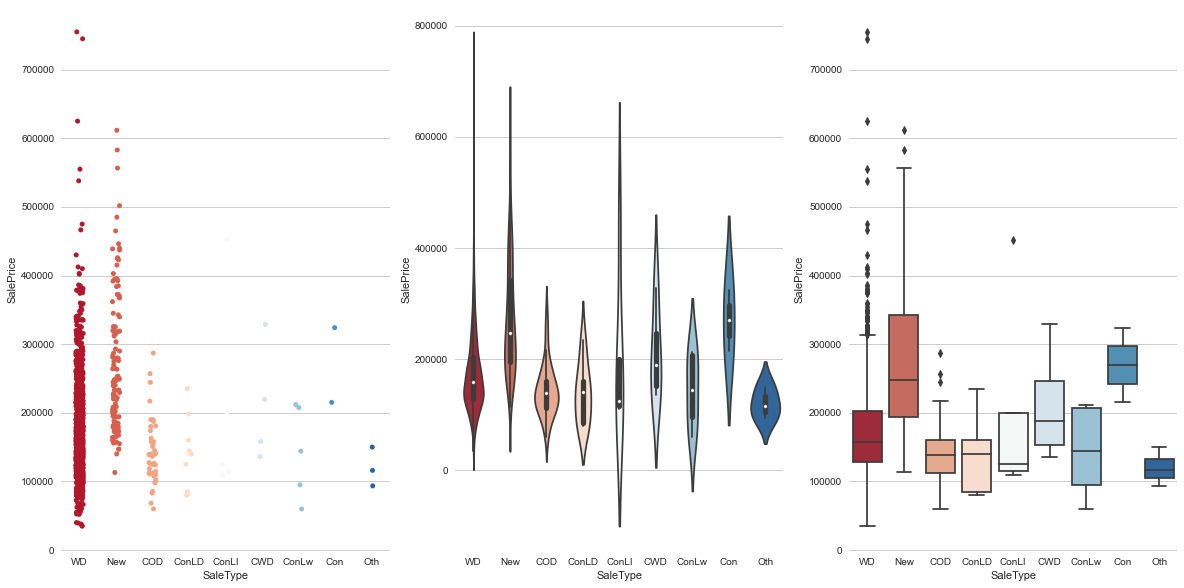

In [115]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'SaleType', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'SaleType', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'SaleType', y='SalePrice', palette="RdBu", ax = ax[2]);

In [116]:
# WD, New, COD, Other

In [117]:
data_train_skip_columns["SaleType_transformed"] = data_train_skip_columns["SaleType"].apply(lambda x: x if x in ["WD", "New", "COD"] else "OtherSaleType")
data_test_skip_columns["SaleType_transformed"] = data_test_skip_columns["SaleType"].apply(lambda x: x if x in ["WD", "New", "COD"] else "OtherSaleType")

In [118]:
all_important_cat_columns_transformed += ["SaleType_transformed"]

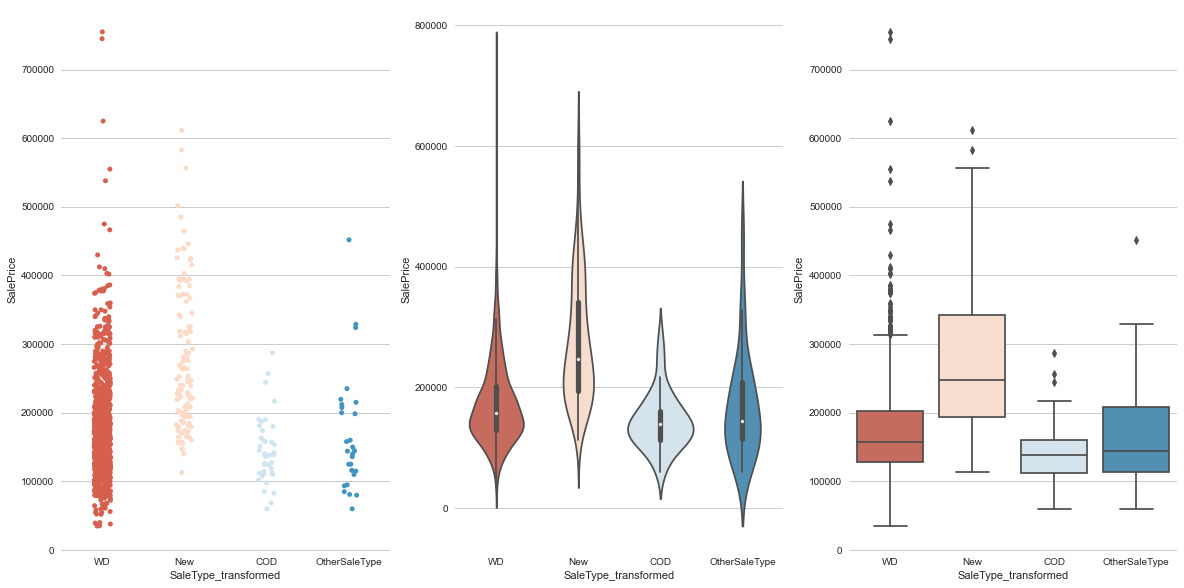

In [119]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'SaleType_transformed', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'SaleType_transformed', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'SaleType_transformed', y='SalePrice', palette="RdBu", ax = ax[2]);

In [120]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="SaleType_transformed", categories=["WD", "New", "COD", "OtherSaleType"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

WD : Power_divergenceResult(statistic=0.011942501063515496, pvalue=0.9999999999981323)
New : Power_divergenceResult(statistic=1.5418240099751883, pvalue=0.9968244373003332)
COD : Power_divergenceResult(statistic=0.175430952153289, pvalue=0.999999688214029)
OtherSaleType : Power_divergenceResult(statistic=0.31259141927473694, pvalue=0.9999960327403545)


#### LotConfig

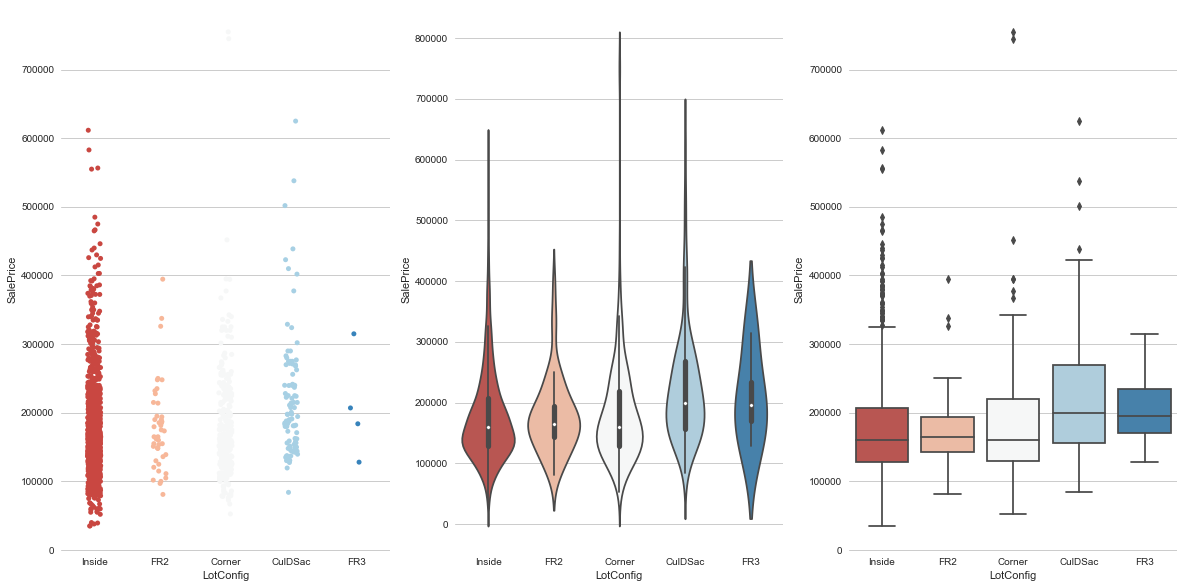

In [121]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'LotConfig', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'LotConfig', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'LotConfig', y='SalePrice', palette="RdBu", ax = ax[2]);

In [122]:
all_important_cat_columns_transformed += ["LotConfig"]

In [123]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="LotConfig", categories=["Inside", "FR2", "Corner", "CulDSac", "FR3"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Inside : Power_divergenceResult(statistic=0.004929557975873265, pvalue=0.999999999999965)
FR2 : Power_divergenceResult(statistic=0.18281900209101087, pvalue=0.9999996257470006)
Corner : Power_divergenceResult(statistic=0.03792890869451666, pvalue=0.9999999996649281)
CulDSac : Power_divergenceResult(statistic=0.5696360674659184, pvalue=0.9999468012174616)
FR3 : Power_divergenceResult(statistic=0.7806884398776984, pvalue=0.9997982885560747)


#### Condition1

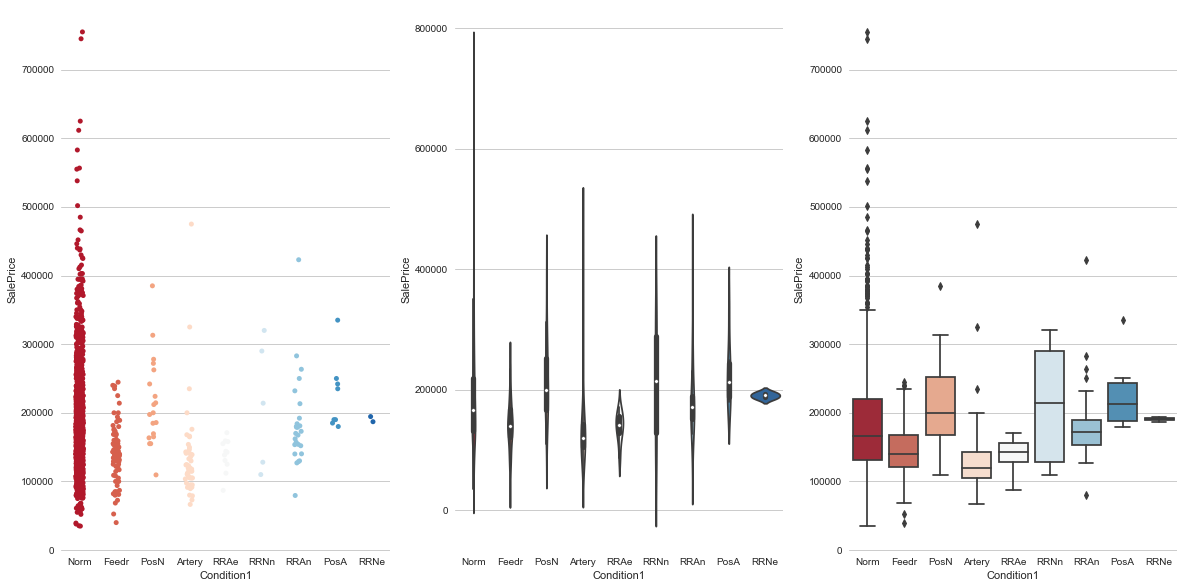

In [124]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'Condition1', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Condition1', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Condition1', y='SalePrice', palette="RdBu", ax = ax[2]);

In [125]:
# Norm, Feedr, OtherCondition1

In [126]:
data_train_skip_columns["Condition1_transformed"] = data_train_skip_columns["Condition1"].apply(lambda x: x if x in ["Norm", "Feedr"] else "OtherCondition1")
data_test_skip_columns["Condition1_transformed"] = data_test_skip_columns["Condition1"].apply(lambda x: x if x in ["Norm", "Feedr"] else "OtherCondition1")

In [127]:
all_important_cat_columns_transformed += ["Condition1_transformed"]

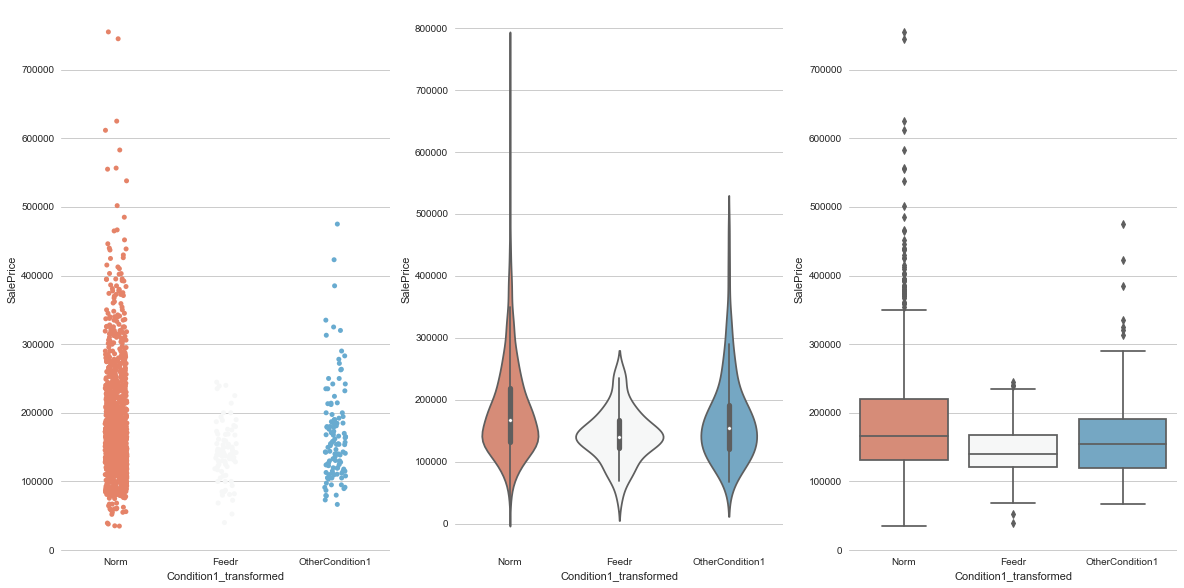

In [128]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'Condition1_transformed', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Condition1_transformed', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Condition1_transformed', y='SalePrice', palette="RdBu", ax = ax[2]);

In [129]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="Condition1_transformed", categories=["Norm", "Feedr", "OtherCondition1"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Norm : Power_divergenceResult(statistic=0.0026349078429692314, pvalue=0.9999999999999979)
Feedr : Power_divergenceResult(statistic=0.28747739581077986, pvalue=0.9999972505014746)
OtherCondition1 : Power_divergenceResult(statistic=0.046915879058281734, pvalue=0.9999999991308094)


#### KitchenQual

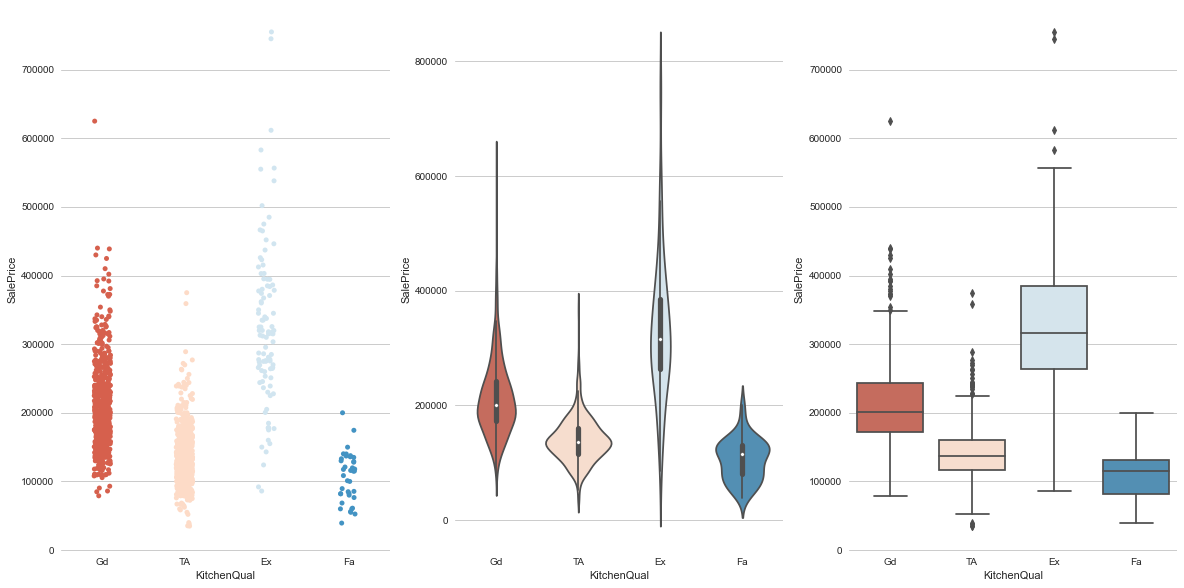

In [130]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'KitchenQual', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'KitchenQual', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'KitchenQual', y='SalePrice', palette="RdBu", ax = ax[2]);

In [131]:
all_important_cat_columns_transformed += ["KitchenQual"]

In [132]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="KitchenQual", categories=["Gd", "TA", "Ex", "Fa"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Gd : Power_divergenceResult(statistic=0.38669869280310526, pvalue=0.9999899730217947)
TA : Power_divergenceResult(statistic=0.32178867802163363, pvalue=0.9999954966508975)
Ex : Power_divergenceResult(statistic=4.317555948816603, pvalue=0.8892969797658296)
Fa : Power_divergenceResult(statistic=1.6350269100410508, pvalue=0.9960156209758126)


#### MSZoning

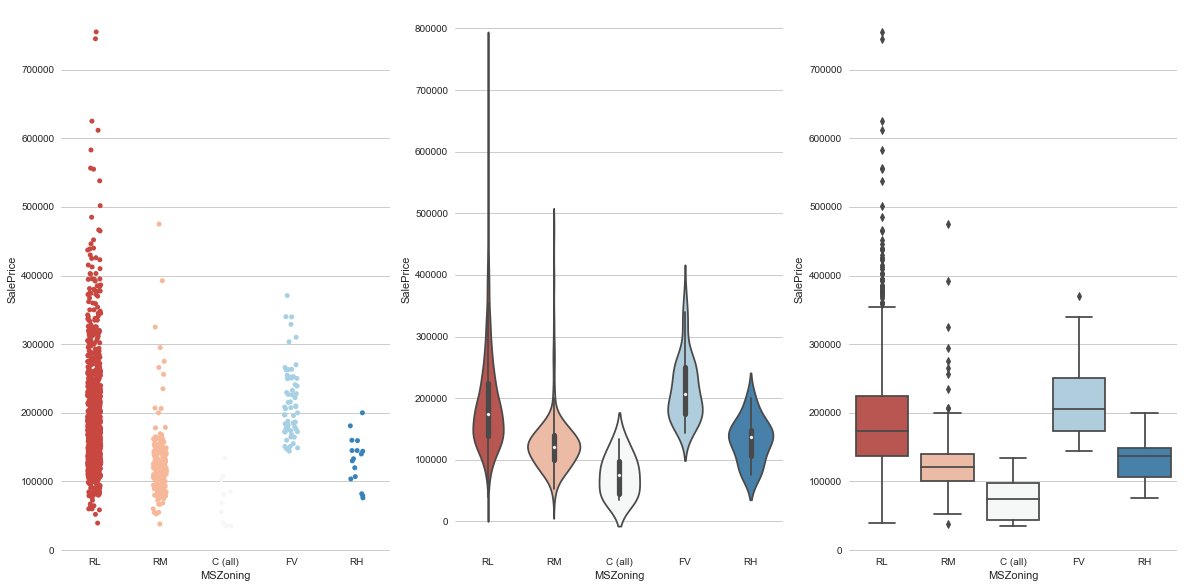

In [133]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'MSZoning', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'MSZoning', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'MSZoning', y='SalePrice', palette="RdBu", ax = ax[2]);

In [134]:
all_important_cat_columns_transformed += ["MSZoning"]

In [135]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="MSZoning", categories=["RL", "RM", "C (all)", "FV", "RH"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

RL : Power_divergenceResult(statistic=0.025862904731843717, pvalue=0.9999999999398879)
RM : Power_divergenceResult(statistic=0.7640244190832278, pvalue=0.9998157146426647)
C (all) : Power_divergenceResult(statistic=5.394288063997607, pvalue=0.7986725239601363)
FV : Power_divergenceResult(statistic=0.40895818225047204, pvalue=0.9999872175063019)
RH : Power_divergenceResult(statistic=0.4665275410515584, pvalue=0.9999774137566809)


#### BsmtQual

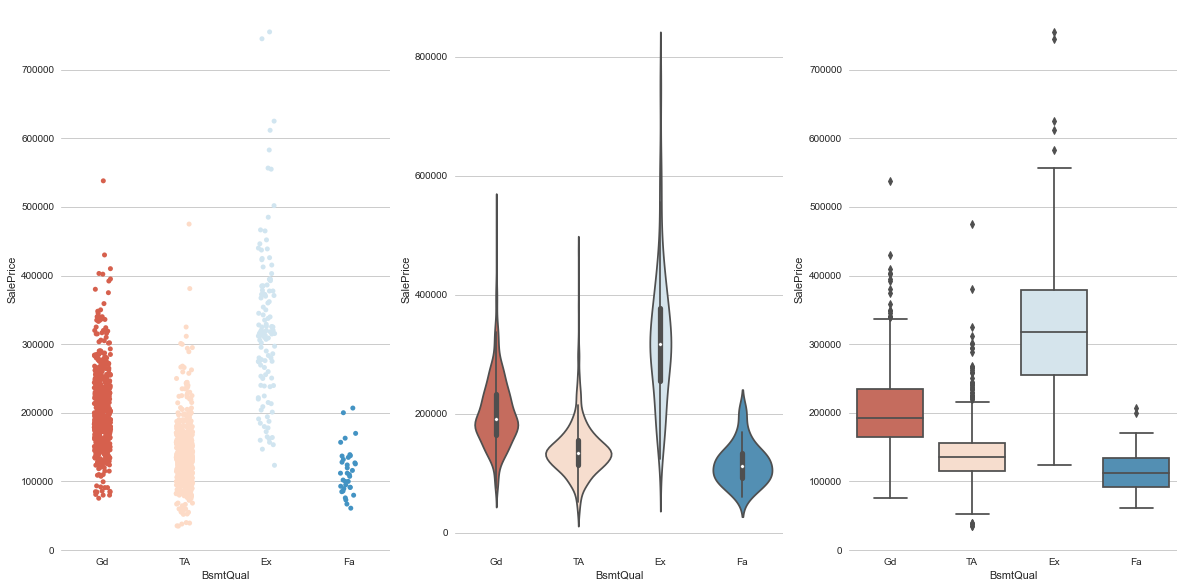

In [136]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'BsmtQual', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'BsmtQual', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'BsmtQual', y='SalePrice', palette="RdBu", ax = ax[2]);

In [137]:
all_important_cat_columns_transformed += ["BsmtQual"]

In [138]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="BsmtQual", categories=["Gd", "TA", "Ex", "Fa"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Gd : Power_divergenceResult(statistic=0.29703645242316234, pvalue=0.9999968268586831)
TA : Power_divergenceResult(statistic=0.338854316271605, pvalue=0.999994357026399)
Ex : Power_divergenceResult(statistic=3.9502089873511954, pvalue=0.914658950778814)
Fa : Power_divergenceResult(statistic=1.3587961550831693, pvalue=0.9980650273916657)


#### PavedDrive

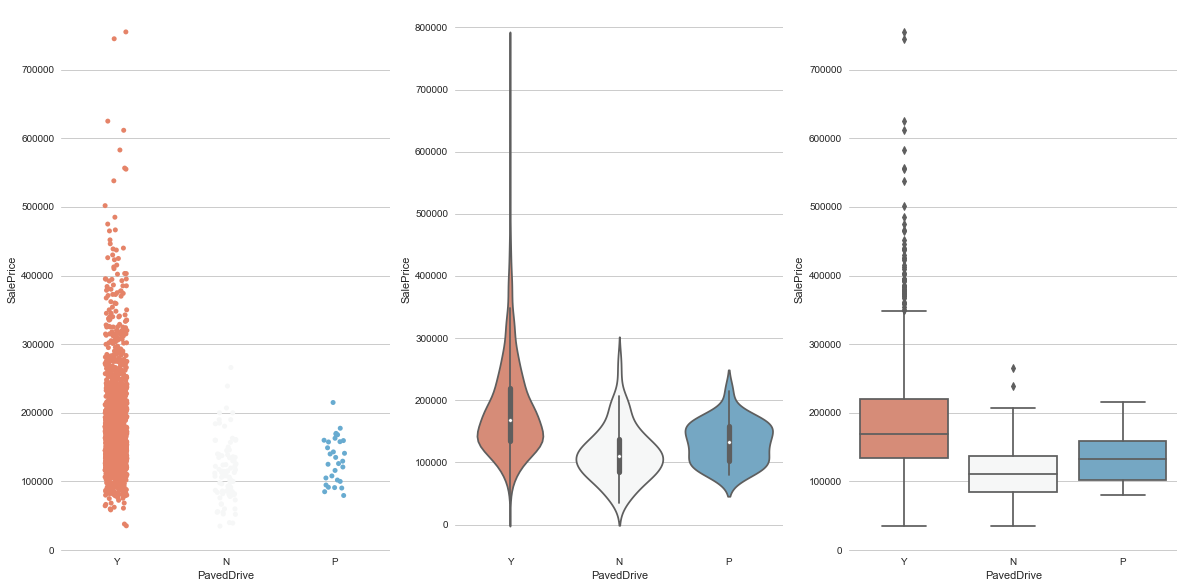

In [139]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'PavedDrive', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'PavedDrive', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'PavedDrive', y='SalePrice', palette="RdBu", ax = ax[2]);

In [140]:
all_important_cat_columns_transformed += ["PavedDrive"]

In [141]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="PavedDrive", categories=["Y", "N", "P"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Y : Power_divergenceResult(statistic=0.00944391056496546, pvalue=0.9999999999993499)
N : Power_divergenceResult(statistic=1.3879792044815014, pvalue=0.9978956185102243)
P : Power_divergenceResult(statistic=0.7896819644558623, pvalue=0.999788390113265)


#### LotShape

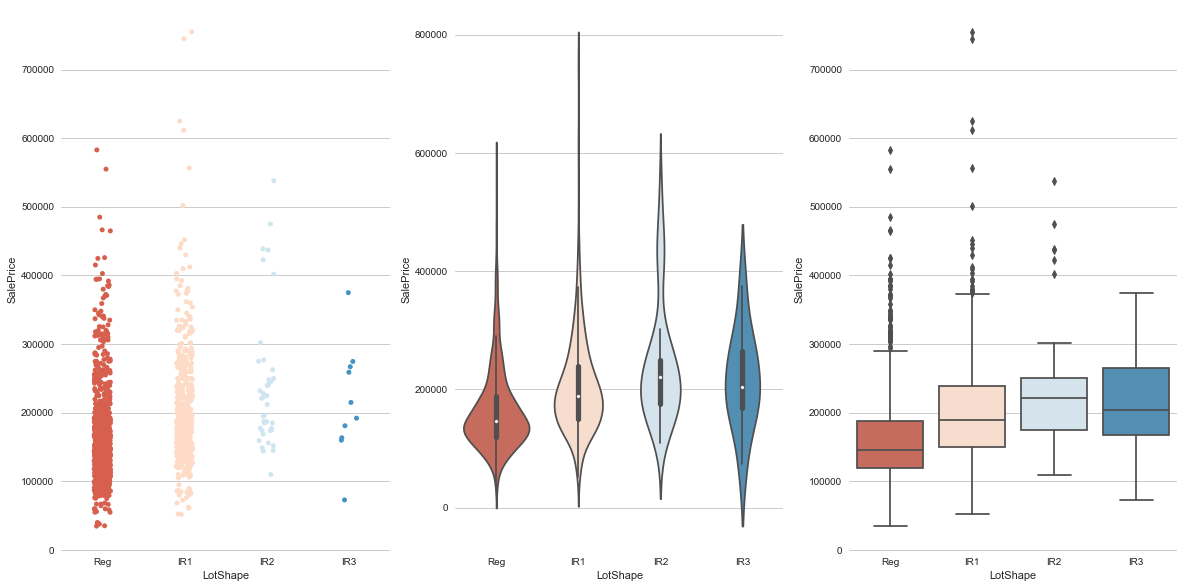

In [142]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'LotShape', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'LotShape', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'LotShape', y='SalePrice', palette="RdBu", ax = ax[2]);

In [143]:
all_important_cat_columns_transformed += ["LotShape"]

In [144]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="LotShape", categories=["Reg", "IR1", "IR2", "IR3"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Reg : Power_divergenceResult(statistic=0.05392140230274241, pvalue=0.9999999983787232)
IR1 : Power_divergenceResult(statistic=0.14774090524325637, pvalue=0.9999998544405648)
IR2 : Power_divergenceResult(statistic=1.6603134743569705, pvalue=0.9957735820815455)
IR3 : Power_divergenceResult(statistic=0.791309862645333, pvalue=0.9997865605679379)


#### HeatingQC

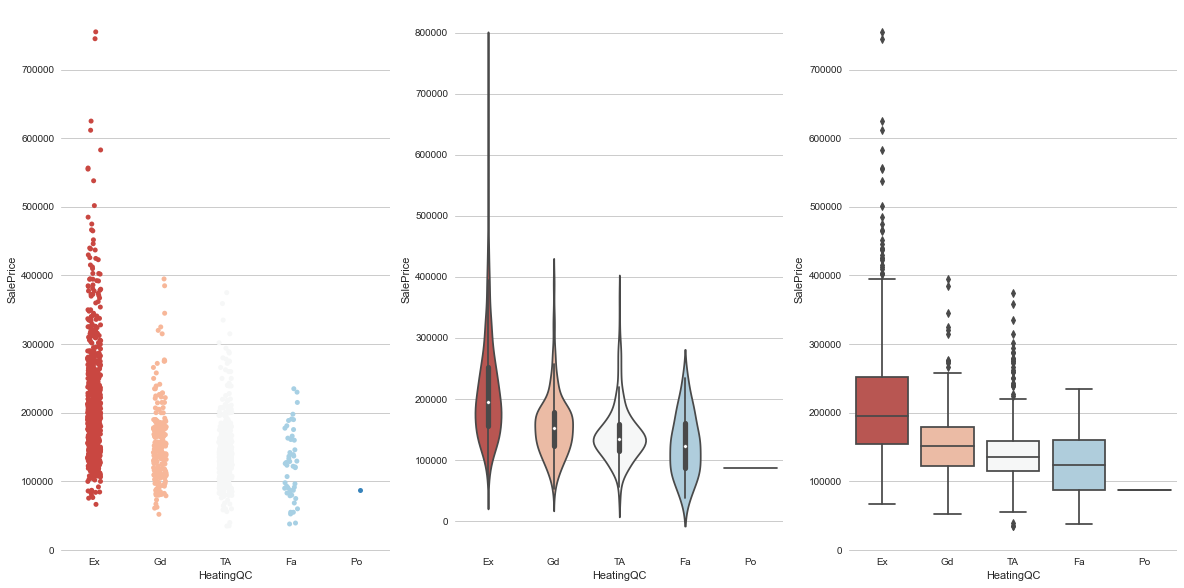

In [145]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'HeatingQC', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'HeatingQC', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'HeatingQC', y='SalePrice', palette="RdBu", ax = ax[2]);

In [146]:
data_train_skip_columns["HeatingQC_transformed"] = data_train_skip_columns["HeatingQC"].apply(lambda x: x if x != "Po" else "Fa")
data_test_skip_columns["HeatingQC_transformed"] = data_test_skip_columns["HeatingQC"].apply(lambda x: x if x != "Po" else "Fa")

In [147]:
all_important_cat_columns_transformed += ["HeatingQC_transformed"]

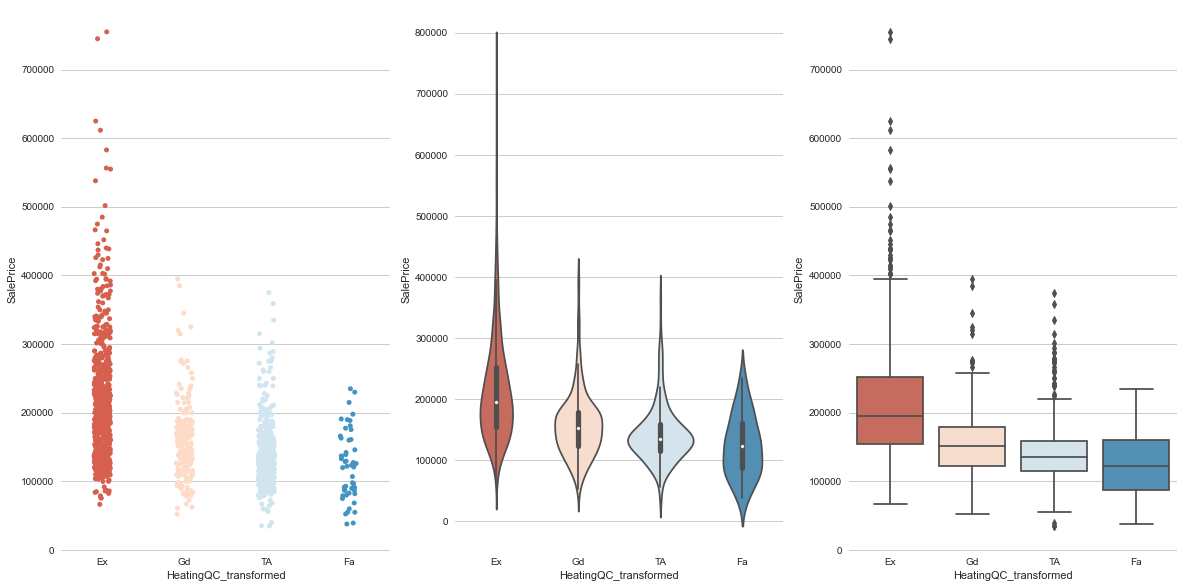

In [148]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'HeatingQC_transformed', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'HeatingQC_transformed', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'HeatingQC_transformed', y='SalePrice', palette="RdBu", ax = ax[2]);

In [149]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="HeatingQC_transformed", categories=["Ex", "Gd", "TA", "Fa"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Ex : Power_divergenceResult(statistic=0.21049873041625203, pvalue=0.9999993021086023)
Gd : Power_divergenceResult(statistic=0.11138260803584511, pvalue=0.9999999585606396)
TA : Power_divergenceResult(statistic=0.2812697710728221, pvalue=0.9999975014442495)
Fa : Power_divergenceResult(statistic=1.1965816831482234, pvalue=0.9988345402359846)


#### Neighborhood

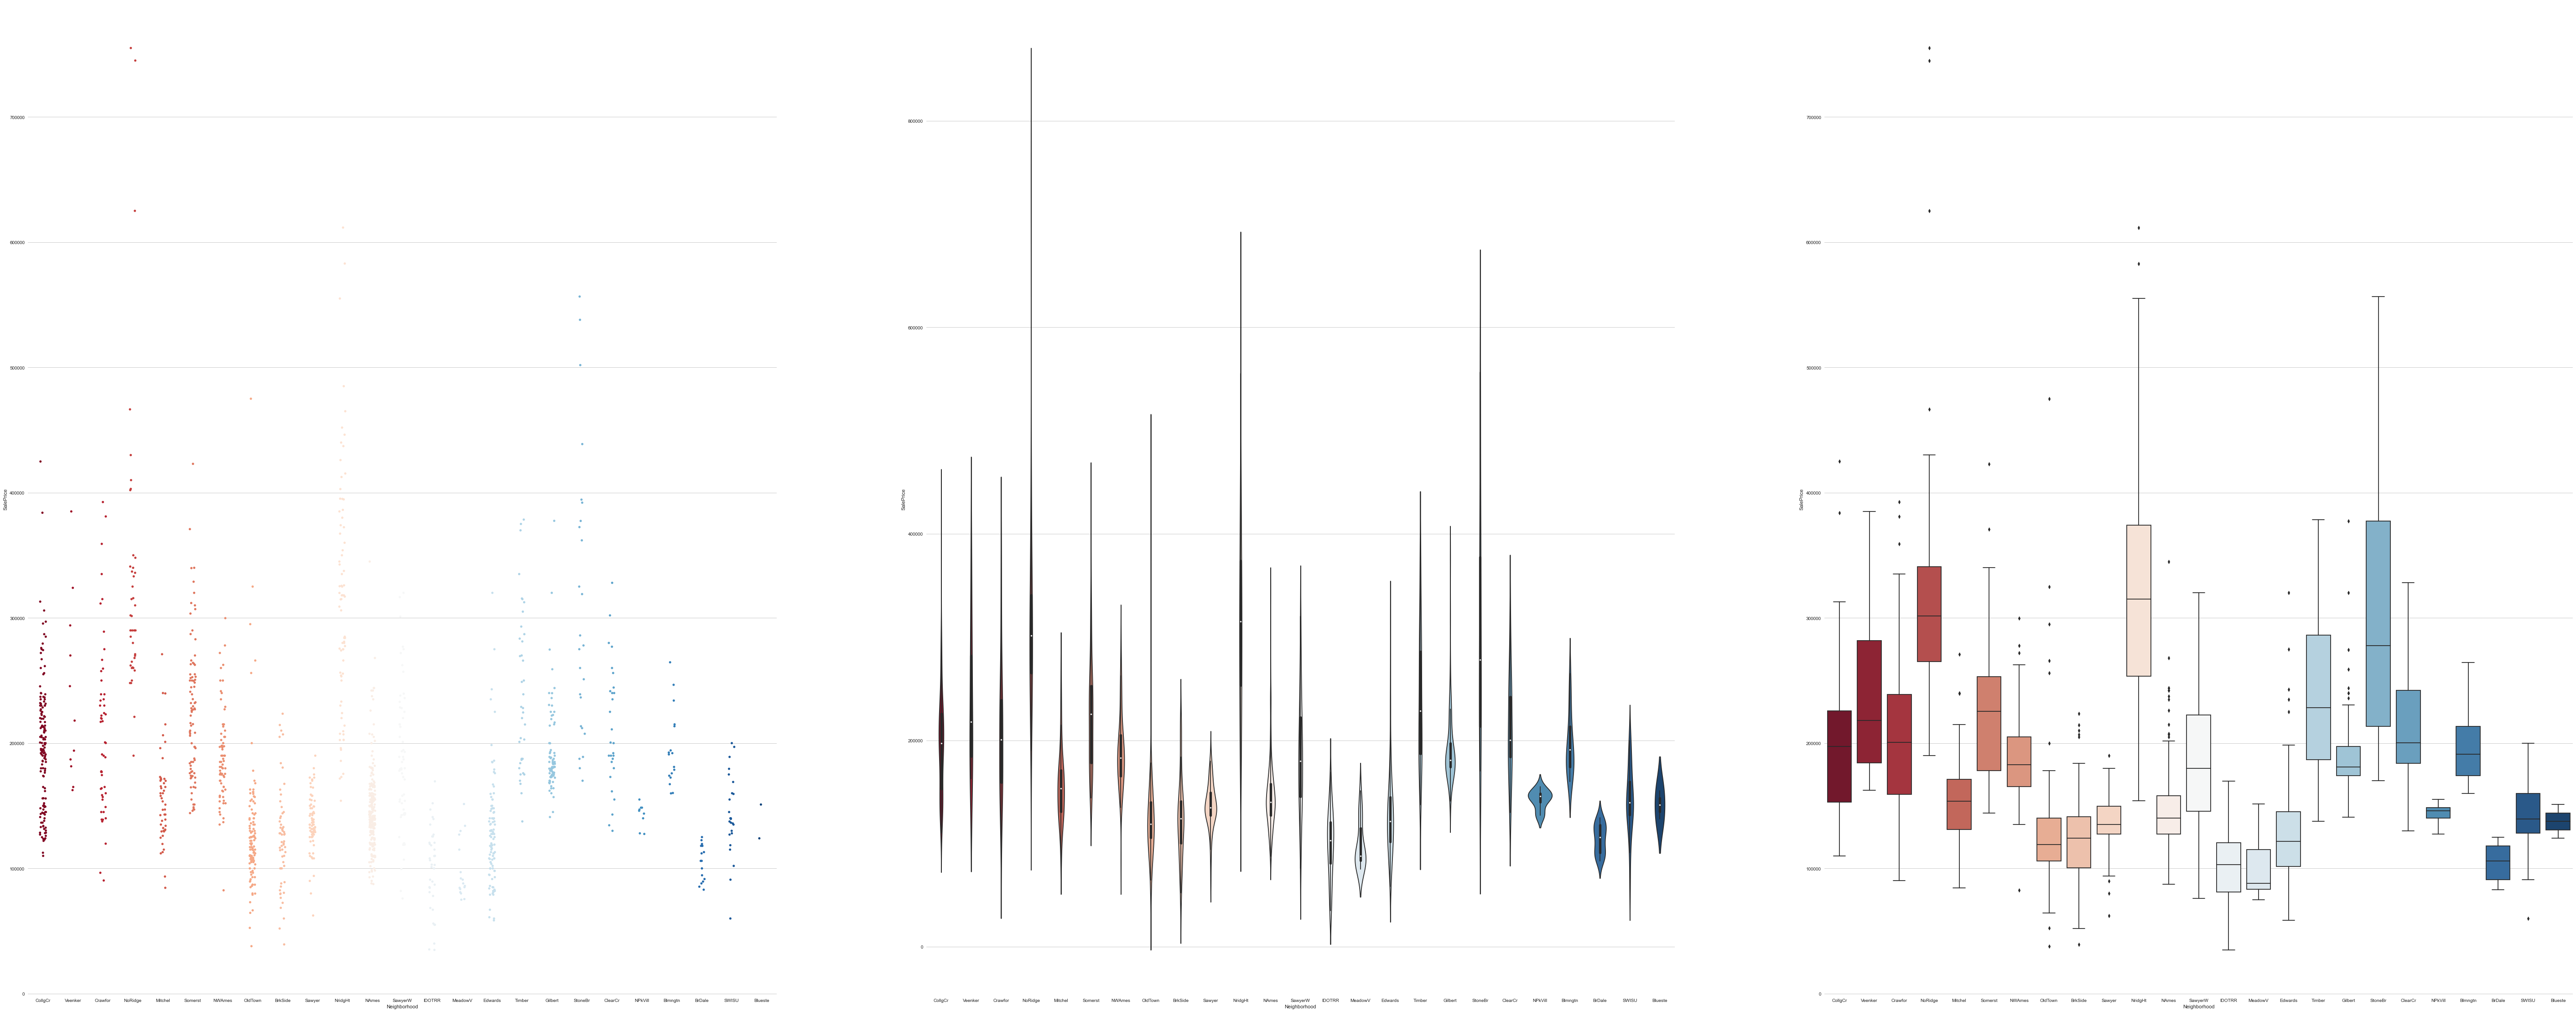

In [150]:
fig, ax = plt.subplots(1,3, figsize = (100,40))
sns.stripplot(data=data_train_skip_columns, x = 'Neighborhood', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Neighborhood', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Neighborhood', y='SalePrice', palette="RdBu", ax = ax[2]);

In [151]:
all_important_cat_columns_transformed += ["Neighborhood"]

In [152]:
categories = ['CollgCr',
 'Veenker',
 'Crawfor',
 'NoRidge',
 'Mitchel',
 'Somerst',
 'NWAmes',
 'OldTown',
 'BrkSide',
 'Sawyer',
 'NridgHt',
 'NAmes',
 'SawyerW',
 'IDOTRR',
 'MeadowV',
 'Edwards',
 'Timber',
 'Gilbert',
 'StoneBr',
 'ClearCr',
 'NPkVill',
 'Blmngtn',
 'BrDale',
 'SWISU',
 'Blueste']
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="Neighborhood", categories=categories)

CollgCr : Power_divergenceResult(statistic=0.5416684949696957, pvalue=0.9999571013645626)
Veenker : Power_divergenceResult(statistic=1.1793532736468997, pvalue=0.998900584764237)
Crawfor : Power_divergenceResult(statistic=0.21854840823038474, pvalue=0.9999991764238281)
NoRidge : Power_divergenceResult(statistic=6.035687476580612, pvalue=0.7363412871383218)
Mitchel : Power_divergenceResult(statistic=0.3800594765017677, pvalue=0.9999906996758998)
Somerst : Power_divergenceResult(statistic=0.5791152128725692, pvalue=0.9999429198430967)
NWAmes : Power_divergenceResult(statistic=0.3991771251543868, pvalue=0.9999884911029082)
OldTown : Power_divergenceResult(statistic=0.6946397696348441, pvalue=0.999876512146929)
BrkSide : Power_divergenceResult(statistic=0.5984324321001955, pvalue=0.999934354072182)
Sawyer : Power_divergenceResult(statistic=0.7368576899671727, pvalue=0.9998416898180189)
NridgHt : Power_divergenceResult(statistic=3.939639340790532, pvalue=0.9153401701490353)
NAmes : Power_di

#### RoofStyle

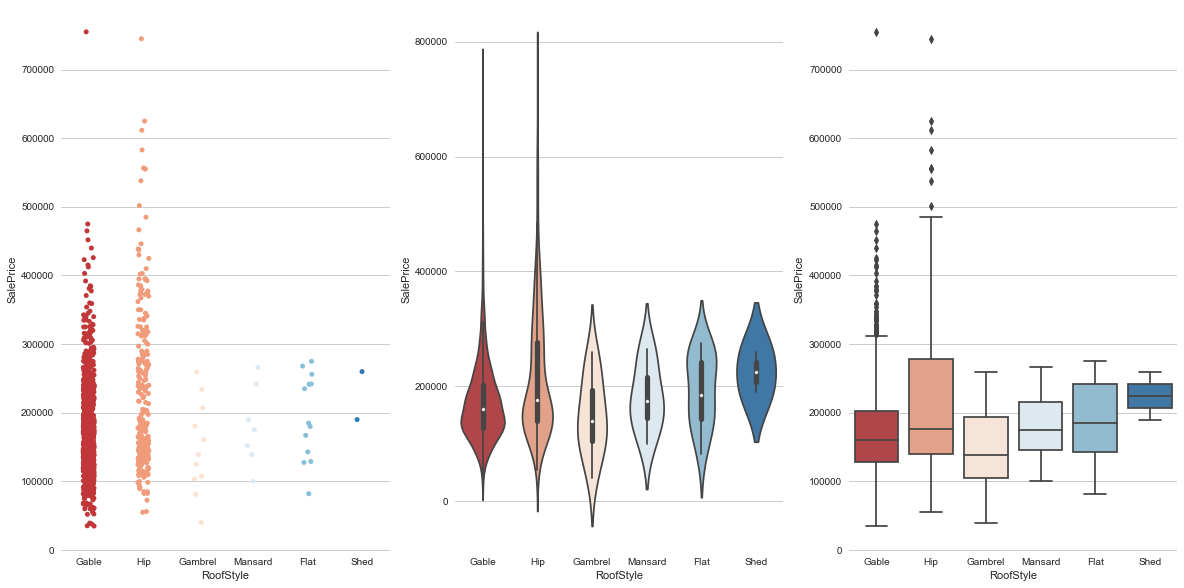

In [153]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'RoofStyle', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'RoofStyle', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'RoofStyle', y='SalePrice', palette="RdBu", ax = ax[2]);

In [154]:
# Gable, Hip, OtherRoofStyle

In [155]:
data_train_skip_columns["RoofStyle_transformed"] = data_train_skip_columns["RoofStyle"].apply(lambda x: x if x in ["Gable", "Hip"] else "OtherRoofStyle")
data_test_skip_columns["RoofStyle_transformed"] = data_test_skip_columns["RoofStyle"].apply(lambda x: x if x in ["Gable", "Hip"] else "OtherRoofStyle")

In [156]:
all_important_cat_columns_transformed += ["RoofStyle_transformed"]

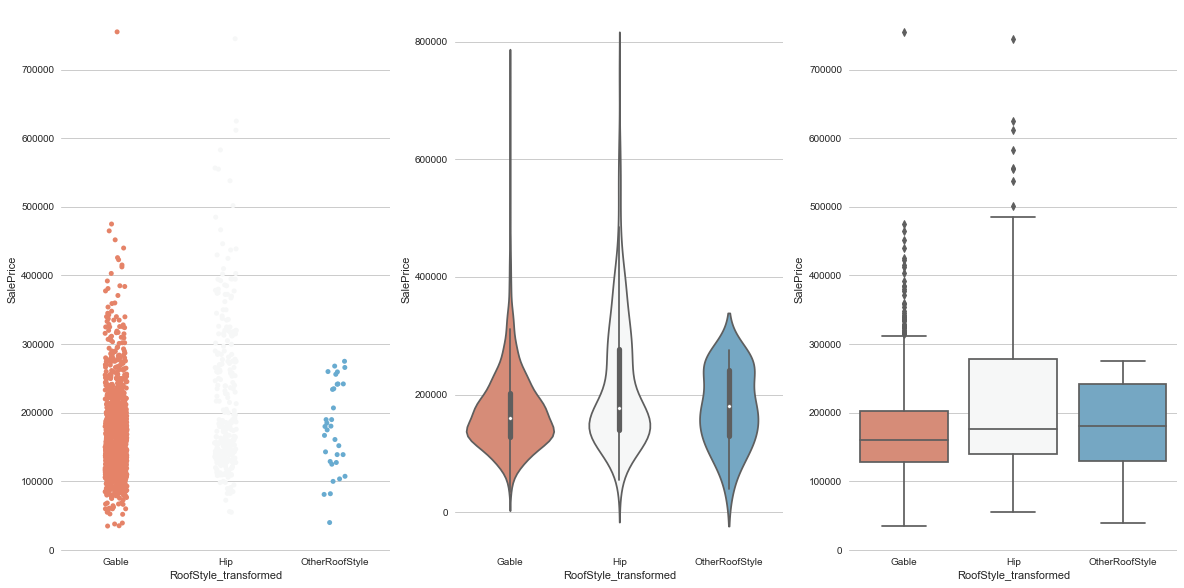

In [157]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'RoofStyle_transformed', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'RoofStyle_transformed', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'RoofStyle_transformed', y='SalePrice', palette="RdBu", ax = ax[2]);

In [158]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="RoofStyle_transformed", categories=["Gable", "Hip", "OtherRoofStyle"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Gable : Power_divergenceResult(statistic=0.020763278377515938, pvalue=0.9999999999775792)
Hip : Power_divergenceResult(statistic=0.34325390193014466, pvalue=0.9999940304551638)
OtherRoofStyle : Power_divergenceResult(statistic=0.24326655015463836, pvalue=0.9999986795167632)


#### Electrical

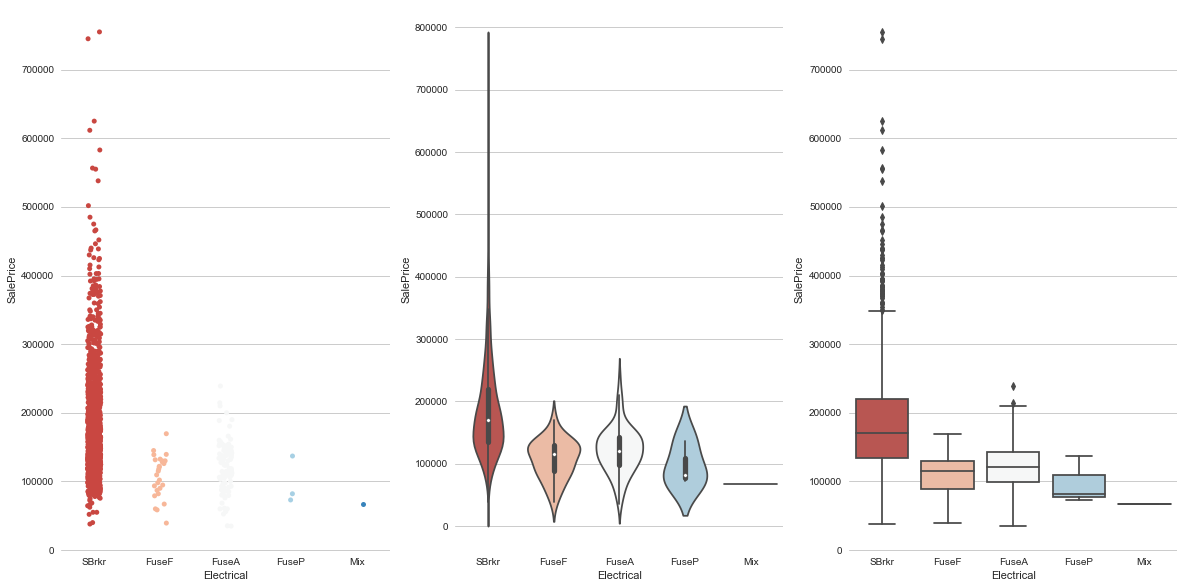

In [159]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'Electrical', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Electrical', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Electrical', y='SalePrice', palette="RdBu", ax = ax[2]);

In [160]:
# SBrkr, FuseF, FuseA, OtherElectrical

In [161]:
data_train_skip_columns["Electrical_transformed"] = data_train_skip_columns["Electrical"].apply(lambda x: x if x not in ["Mix", "FuseP"] else "OtherElectrical")
data_test_skip_columns["Electrical_transformed"] = data_test_skip_columns["Electrical"].apply(lambda x: x if x not in ["Mix", "FuseP"] else "OtherElectrical")

In [162]:
all_important_cat_columns_transformed += ["Electrical_transformed"]

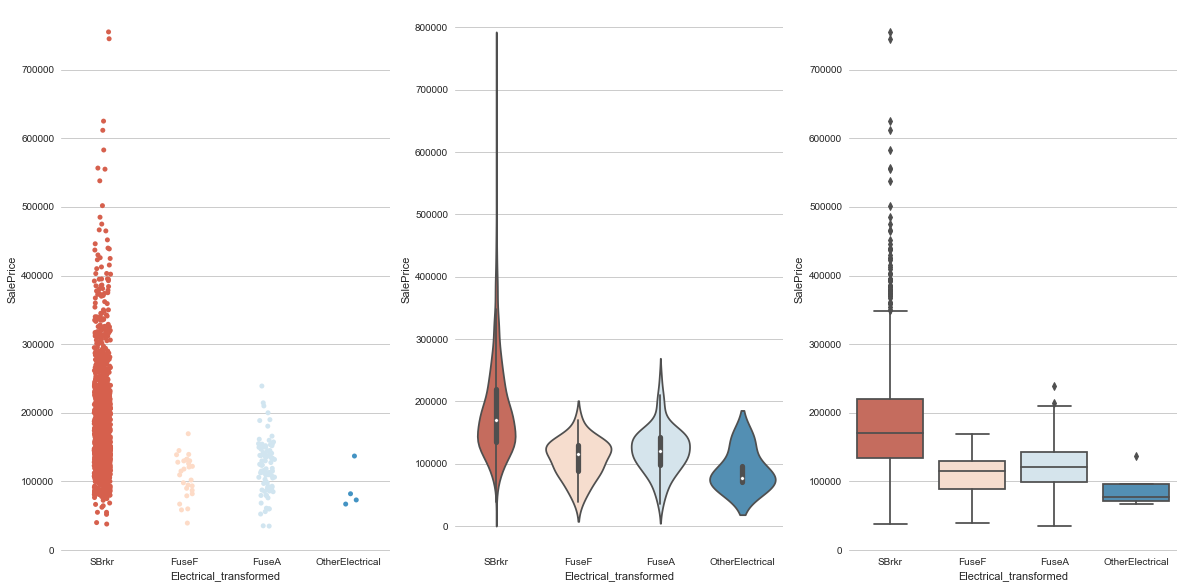

In [163]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'Electrical_transformed', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Electrical_transformed', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Electrical_transformed', y='SalePrice', palette="RdBu", ax = ax[2]);

In [164]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="Electrical_transformed", categories=["SBrkr", "FuseF", "FuseA", "OtherElectrical"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

SBrkr : Power_divergenceResult(statistic=0.00826114019627132, pvalue=0.9999999999996437)
FuseF : Power_divergenceResult(statistic=1.5718757023505754, pvalue=0.9965775982027602)
FuseA : Power_divergenceResult(statistic=0.7294349585459999, pvalue=0.9998482855476791)
OtherElectrical : Power_divergenceResult(statistic=4.6751967216178825, pvalue=0.8616536599382318)


#### GarageFinish

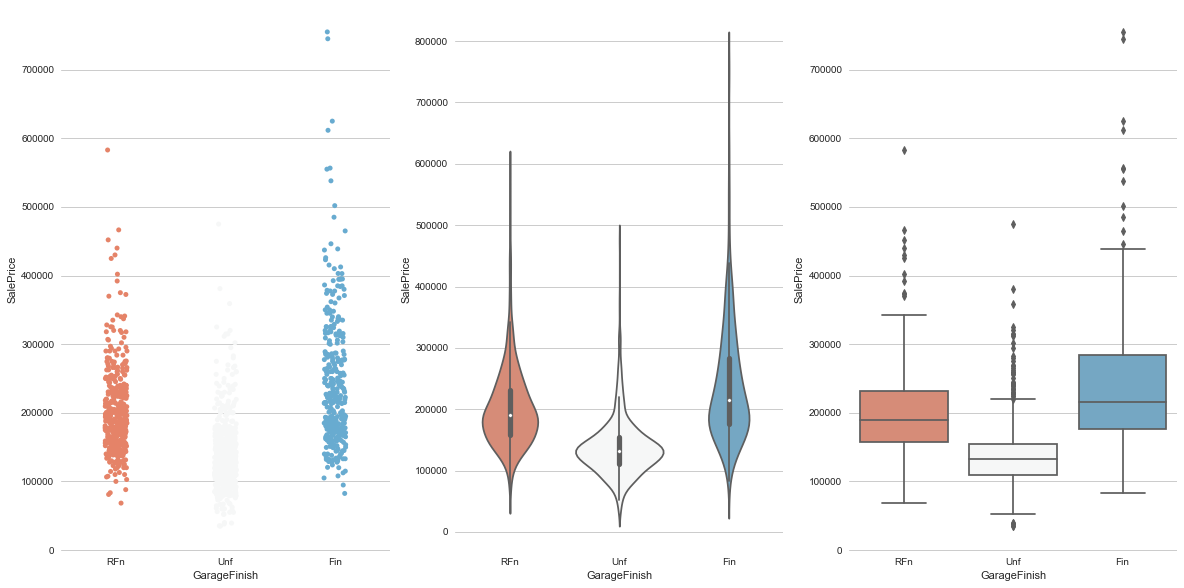

In [165]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'GarageFinish', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'GarageFinish', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'GarageFinish', y='SalePrice', palette="RdBu", ax = ax[2]);

In [166]:
all_important_cat_columns_transformed += ["GarageFinish"]

In [167]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="GarageFinish", categories=["RFn", "Unf", "Fin"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

RFn : Power_divergenceResult(statistic=0.2439590199404042, pvalue=0.9999986628951498)
Unf : Power_divergenceResult(statistic=0.37902423090377674, pvalue=0.9999908092625261)
Fin : Power_divergenceResult(statistic=0.5493556444475759, pvalue=0.9999544353054569)


#### LandSlope

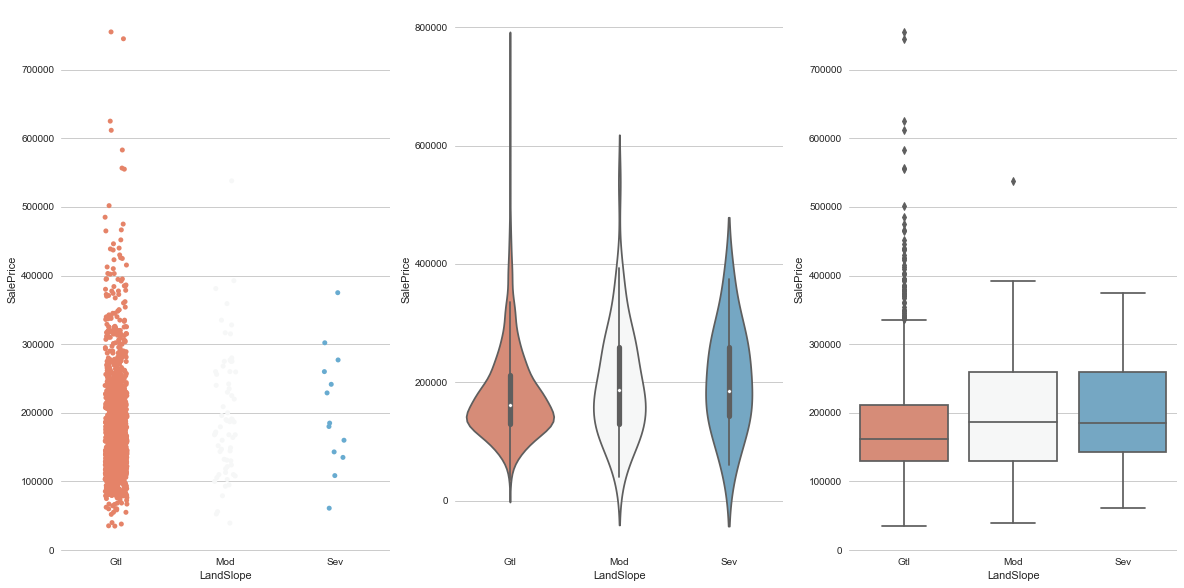

In [168]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'LandSlope', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'LandSlope', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'LandSlope', y='SalePrice', palette="RdBu", ax = ax[2]);

In [169]:
all_important_cat_columns_transformed += ["LandSlope"]

In [170]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="LandSlope", categories=["Gtl", "Mod", "Sev"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Gtl : Power_divergenceResult(statistic=0.0008702867781166839, pvalue=1.0)
Mod : Power_divergenceResult(statistic=0.28200787130575, pvalue=0.9999974725638101)
Sev : Power_divergenceResult(statistic=0.3654604450694202, pvalue=0.9999921561775585)


#### ExterQual

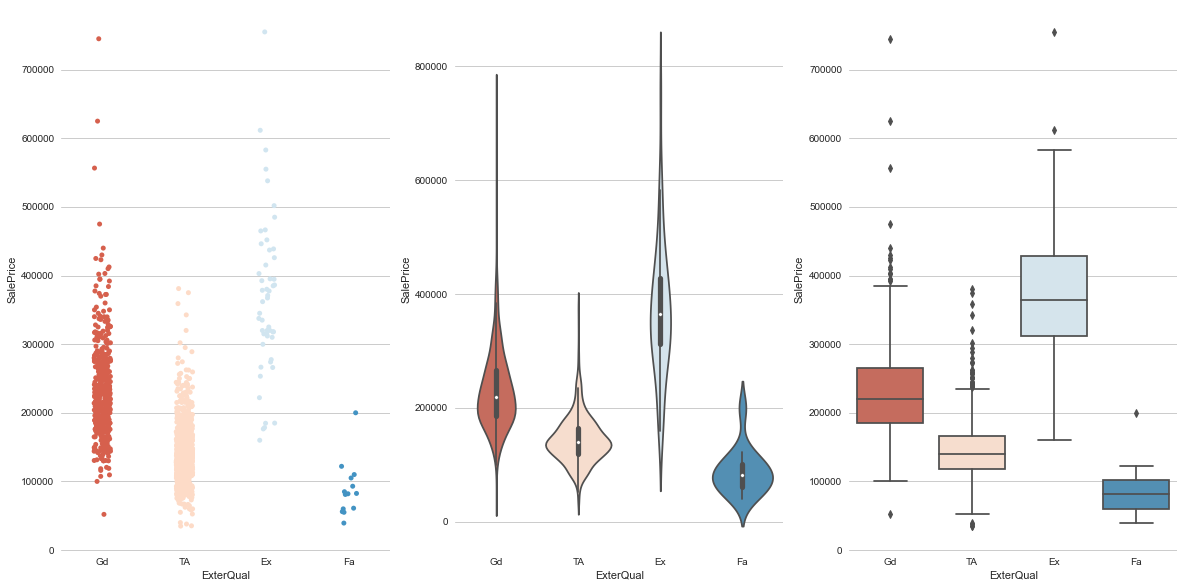

In [171]:
fig, ax = plt.subplots(1,3, figsize = (20,10))
sns.stripplot(data=data_train_skip_columns, x = 'ExterQual', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'ExterQual', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'ExterQual', y='SalePrice', palette="RdBu", ax = ax[2]);

In [172]:
all_important_cat_columns_transformed += ["ExterQual"]

In [173]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="ExterQual", categories=["Gd", "TA", "Ex", "Fa"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Gd : Power_divergenceResult(statistic=0.6820723180396875, pvalue=0.9998856717844024)
TA : Power_divergenceResult(statistic=0.25489234232255825, pvalue=0.9999983785281221)
Ex : Power_divergenceResult(statistic=7.311240042296268, pvalue=0.6047496893251534)
Fa : Power_divergenceResult(statistic=5.151226085777242, pvalue=0.8209312047436687)


#### Exterior1st

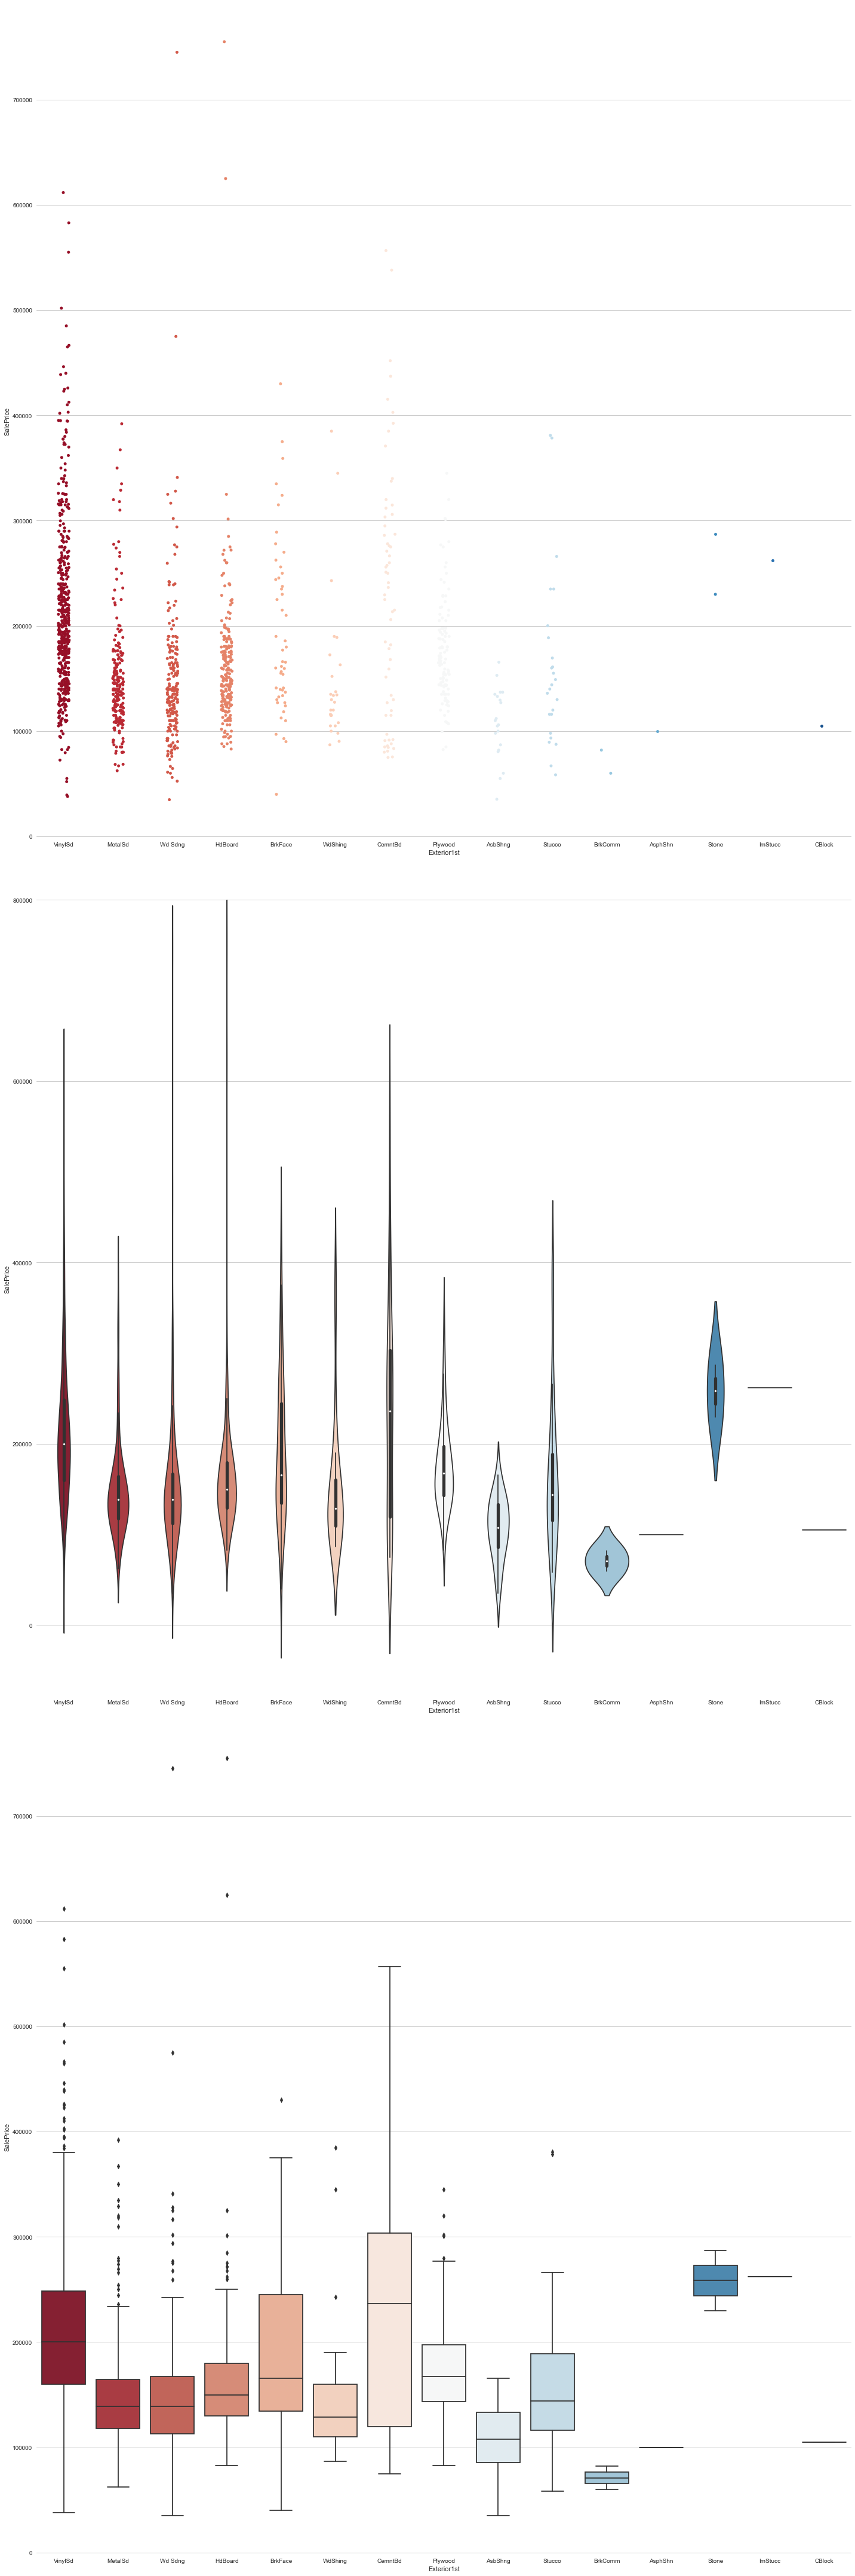

In [174]:
fig, ax = plt.subplots(3,1, figsize = (20, 60))
sns.stripplot(data=data_train_skip_columns, x = 'Exterior1st', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Exterior1st', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Exterior1st', y='SalePrice', palette="RdBu", ax = ax[2]);
plt.tight_layout()

In [175]:
data_train_skip_columns["Exterior1st"].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [176]:
data_train_skip_columns["Exterior1st_transformed"] = data_train_skip_columns["Exterior1st"].apply(lambda x: x if x not in ['BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'] else "OtherExterior1st")
data_test_skip_columns["Exterior1st_transformed"] = data_test_skip_columns["Exterior1st"].apply(lambda x: x if x not in ['BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'] else "OtherExterior1st")

In [177]:
all_important_cat_columns_transformed += ["Exterior1st_transformed"]

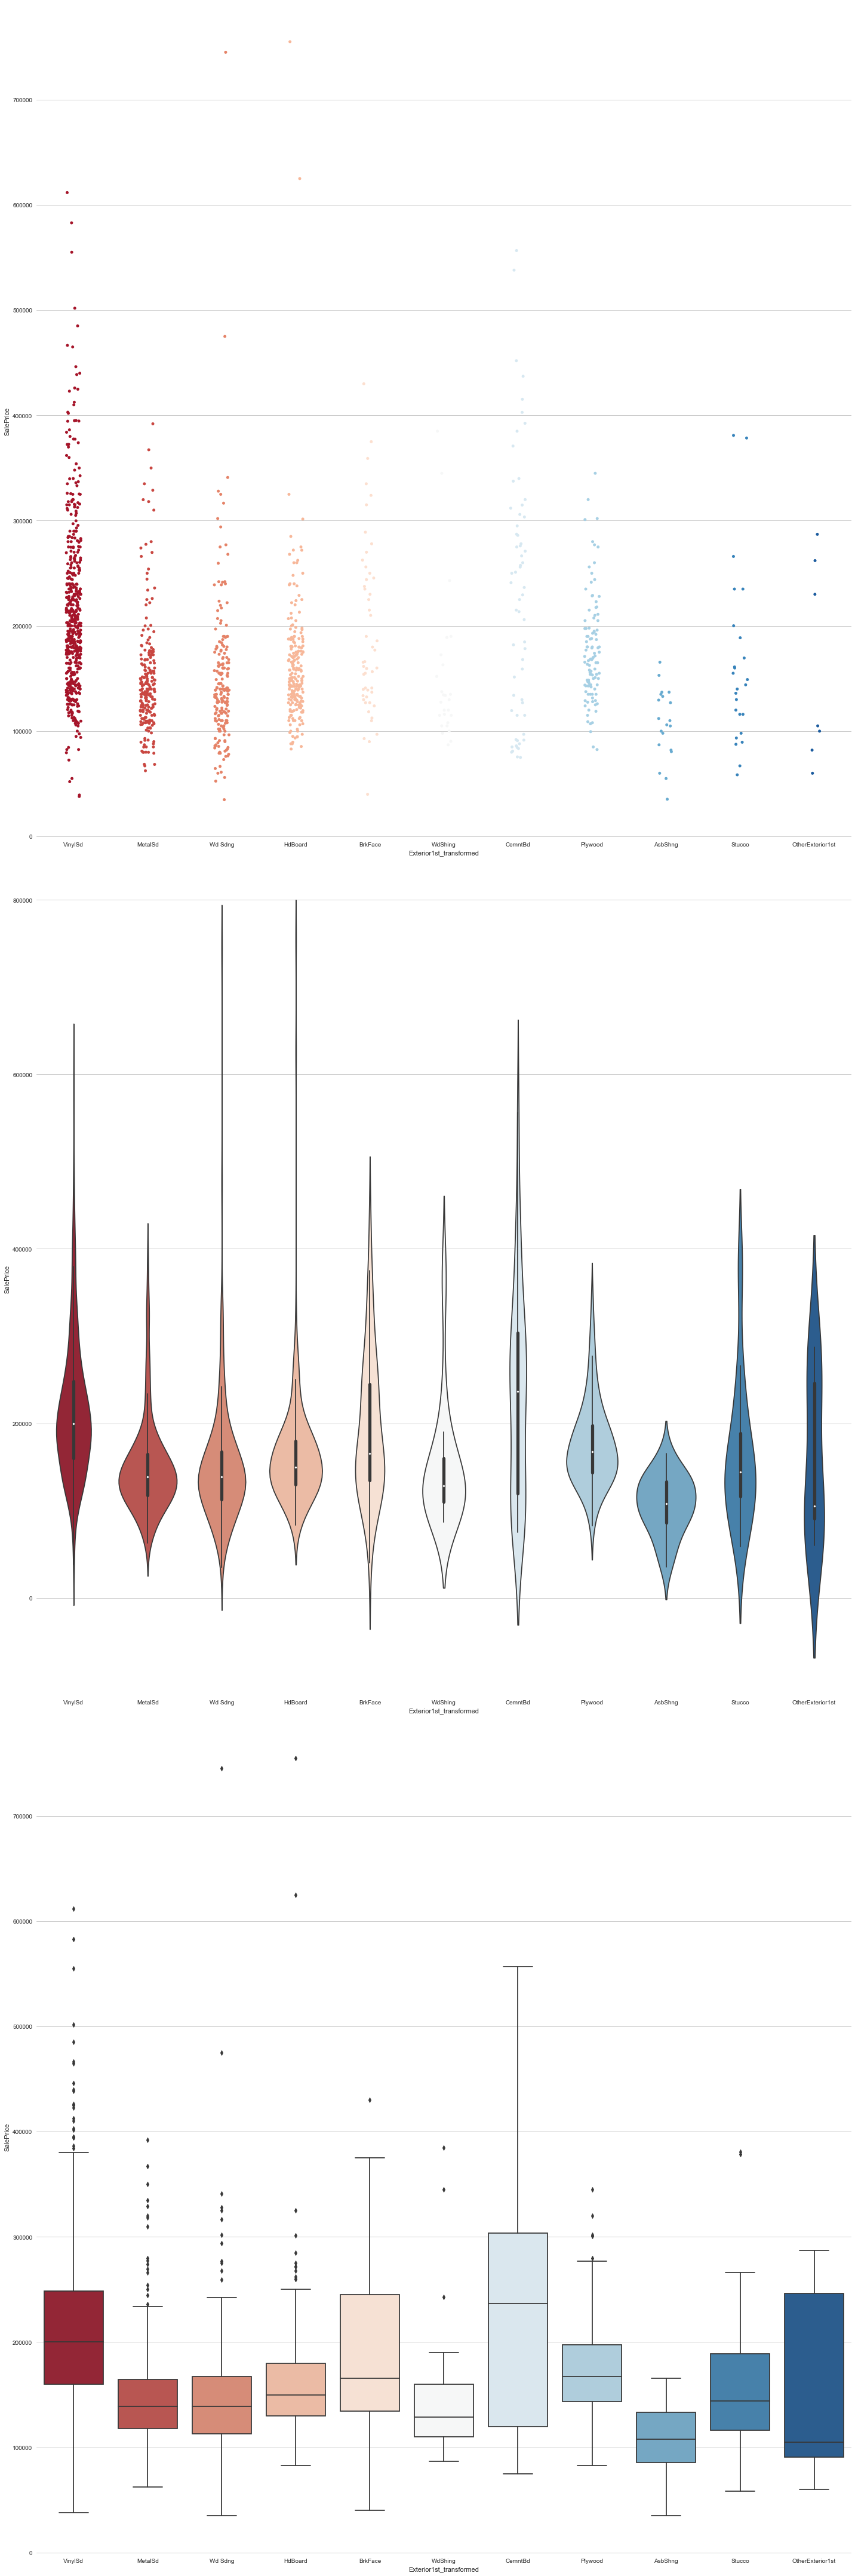

In [178]:
fig, ax = plt.subplots(3,1, figsize = (20, 60))
sns.stripplot(data=data_train_skip_columns, x = 'Exterior1st_transformed', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Exterior1st_transformed', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Exterior1st_transformed', y='SalePrice', palette="RdBu", ax = ax[2]);
plt.tight_layout()

In [179]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="Exterior1st_transformed", categories=['VinylSd',
 'MetalSd',
 'Wd Sdng',
 'HdBoard',
 'BrkFace',
 'WdShing',
 'CemntBd',
 'Plywood',
 'AsbShng',
 'Stucco',
 'OtherExterior1st'])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

VinylSd : Power_divergenceResult(statistic=0.26406735329258074, pvalue=0.9999981059302203)
MetalSd : Power_divergenceResult(statistic=0.24582085169765272, pvalue=0.9999986174078058)
Wd Sdng : Power_divergenceResult(statistic=0.25193229402321826, pvalue=0.9999984597004979)
HdBoard : Power_divergenceResult(statistic=0.16477240462242018, pvalue=0.9999997638174218)
BrkFace : Power_divergenceResult(statistic=0.08557681394931342, pvalue=0.9999999872086671)
WdShing : Power_divergenceResult(statistic=0.4189787981764294, pvalue=0.9999858043622739)
CemntBd : Power_divergenceResult(statistic=1.1990936728753092, pvalue=0.9988246768787219)
Plywood : Power_divergenceResult(statistic=0.12757921295315627, pvalue=0.9999999241646487)
AsbShng : Power_divergenceResult(statistic=1.9710571567418038, pvalue=0.9919170625623519)
Stucco : Power_divergenceResult(statistic=0.33420077033401785, pvalue=0.9999946874166287)
OtherExterior1st : Power_divergenceResult(statistic=3.183904208415889, pvalue=0.95655501471715

#### LandContour

In [180]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
sns.stripplot(data=data_train_skip_columns, x = 'LandContour', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'LandContour', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'LandContour', y='SalePrice', palette="RdBu", ax = ax[2]);

In [181]:
all_important_cat_columns_transformed += ["LandContour"]

In [182]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="LandContour", categories=["Lvl", "Bnk", "Low", "HLS"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Lvl : Power_divergenceResult(statistic=0.0008906310617667625, pvalue=1.0)
Bnk : Power_divergenceResult(statistic=0.23732999255018558, pvalue=0.99999881559545)
Low : Power_divergenceResult(statistic=0.6203144667438552, pvalue=0.9999235214501159)
HLS : Power_divergenceResult(statistic=0.5720735191801053, pvalue=0.9999458227660116)


#### HouseStyle

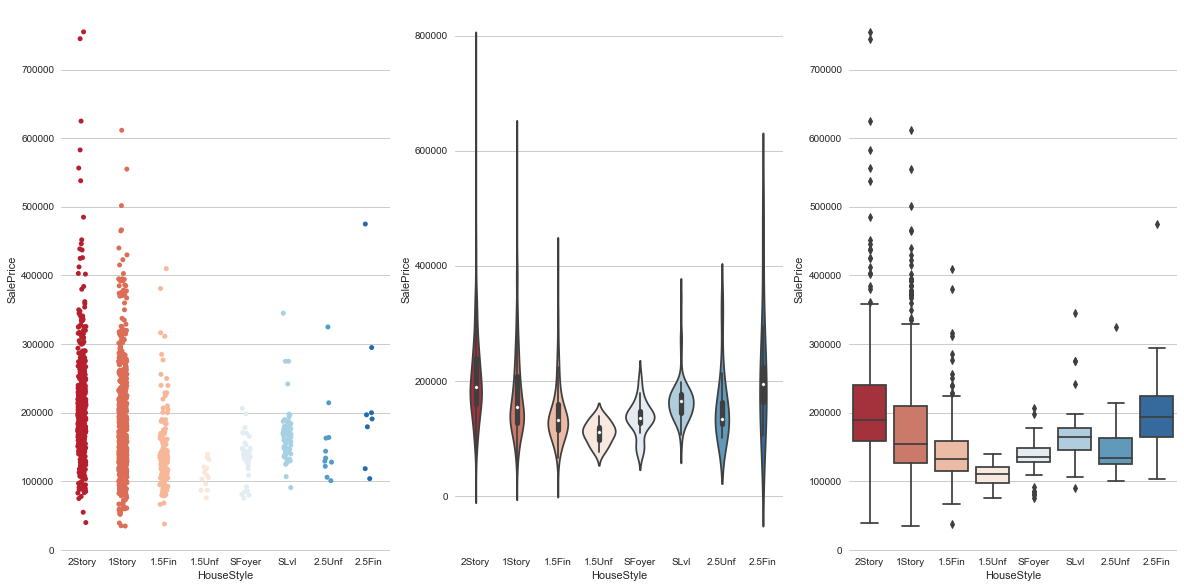

In [183]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
sns.stripplot(data=data_train_skip_columns, x = 'HouseStyle', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'HouseStyle', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'HouseStyle', y='SalePrice', palette="RdBu", ax = ax[2]);

In [184]:
all_important_cat_columns_transformed += ["HouseStyle"]

In [185]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="HouseStyle", categories=["2Story", "1Story", "1.5Fin", "1.5Unf", "SFoyer", "SLvl", "2.5Unf", "2.5Fin"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

2Story : Power_divergenceResult(statistic=0.1626226892242921, pvalue=0.9999997771750208)
1Story : Power_divergenceResult(statistic=0.00558201621805181, pvalue=0.9999999999999389)
1.5Fin : Power_divergenceResult(statistic=0.28938532468933065, pvalue=0.9999971696280763)
1.5Unf : Power_divergenceResult(statistic=1.471298040355539, pvalue=0.9973541472795098)
SFoyer : Power_divergenceResult(statistic=0.511378302063067, pvalue=0.9999664784779335)
SLvl : Power_divergenceResult(statistic=0.277128289578913, pvalue=0.9999976588348842)
2.5Unf : Power_divergenceResult(statistic=0.41280945370370514, pvalue=0.9999866876831489)
2.5Fin : Power_divergenceResult(statistic=6.036349832598219, pvalue=0.736274800486693)


#### Foundation

In [186]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
sns.stripplot(data=data_train_skip_columns, x = 'Foundation', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Foundation', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Foundation', y='SalePrice', palette="RdBu", ax = ax[2]);

In [187]:
all_important_cat_columns_transformed += ["Foundation"]

In [188]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="Foundation", categories=["PConc", "CBlock", "BrkTil", "Wood", "Slab", "Stone"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

PConc : Power_divergenceResult(statistic=0.37014724034204777, pvalue=0.9999917090740225)
CBlock : Power_divergenceResult(statistic=0.20957180091087102, pvalue=0.9999993155729244)
BrkTil : Power_divergenceResult(statistic=0.646266654405577, pvalue=0.9999089939952251)
Wood : Power_divergenceResult(statistic=0.3324071292989896, pvalue=0.999994810734456)
Slab : Power_divergenceResult(statistic=2.2517582421661086, pvalue=0.9868322940805008)
Stone : Power_divergenceResult(statistic=0.9805110550845915, pvalue=0.9994811173140387)


#### ExterCond

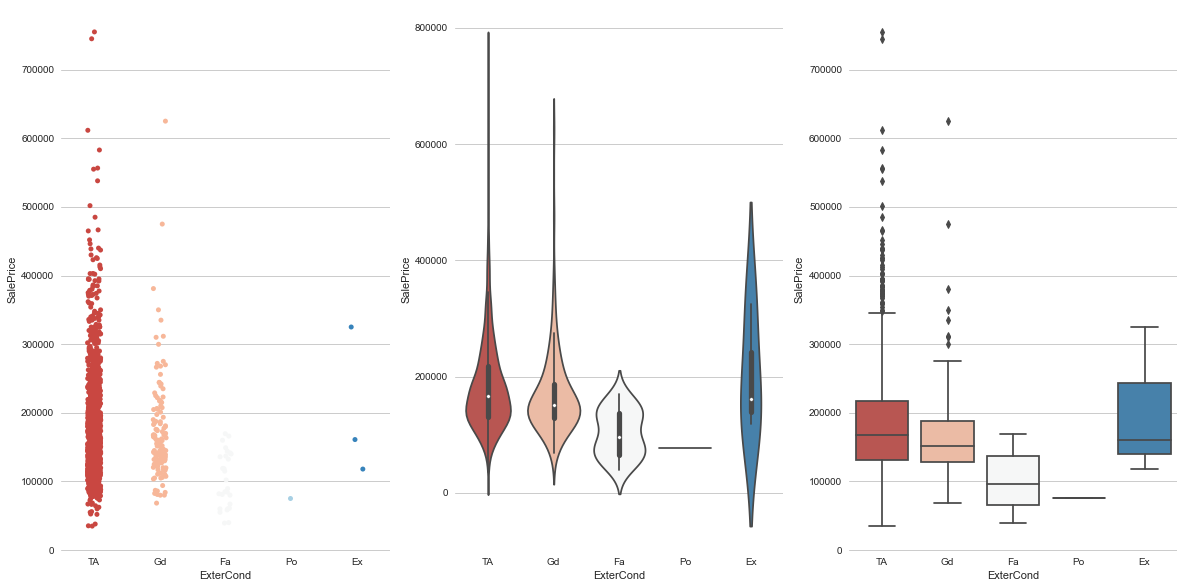

In [189]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
sns.stripplot(data=data_train_skip_columns, x = 'ExterCond', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'ExterCond', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'ExterCond', y='SalePrice', palette="RdBu", ax = ax[2]);

In [190]:
# TA, Gd, OtherExterCond

In [191]:
data_train_skip_columns["ExterCond_transformed"] = data_train_skip_columns["ExterCond"].apply(lambda x: x if x in ["TA", "Gd"] else "OtherExterCond")
data_test_skip_columns["ExterCond_transformed"] = data_test_skip_columns["ExterCond"].apply(lambda x: x if x in ["TA", "Gd"] else "OtherExterCond")

In [192]:
all_important_cat_columns_transformed += ["ExterCond_transformed"]

In [193]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="ExterCond_transformed", categories=["TA", "Gd", "OtherExterCond"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

TA : Power_divergenceResult(statistic=0.0027968717890142093, pvalue=0.9999999999999972)
Gd : Power_divergenceResult(statistic=0.10454614186369299, pvalue=0.9999999687511792)
OtherExterCond : Power_divergenceResult(statistic=1.9378805691980727, pvalue=0.9924122396483687)


#### BldgType

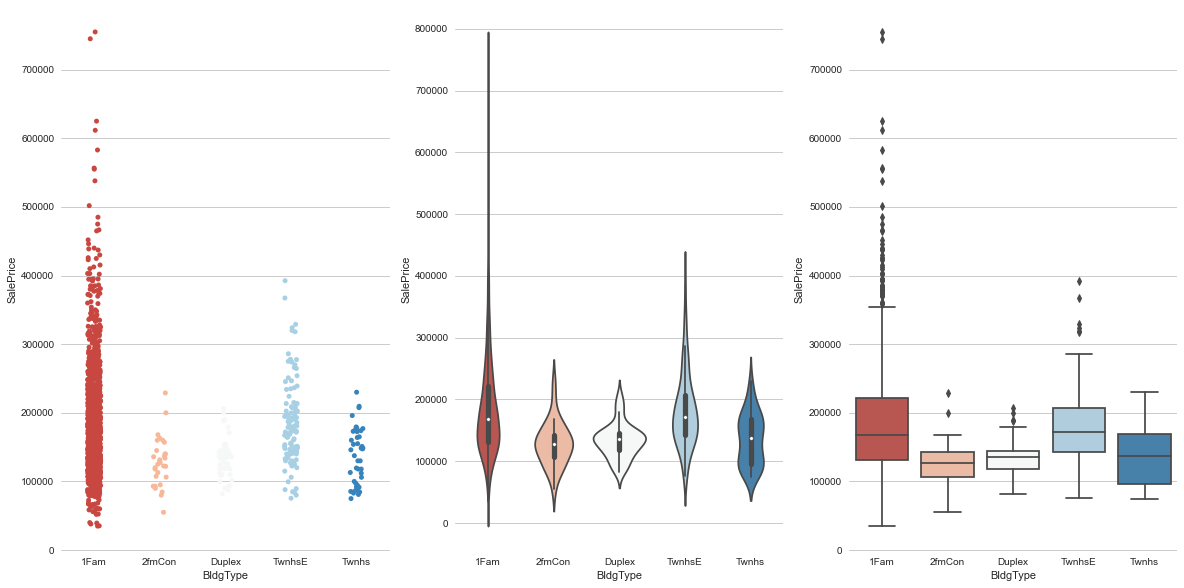

In [194]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
sns.stripplot(data=data_train_skip_columns, x = 'BldgType', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'BldgType', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'BldgType', y='SalePrice', palette="RdBu", ax = ax[2]);

In [195]:
all_important_cat_columns_transformed += ["BldgType"]

In [196]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="BldgType", categories=["1Fam", "2fmCon", "Duplex", "TwnhsE", "Twnhs"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

1Fam : Power_divergenceResult(statistic=0.004382043562903934, pvalue=0.9999999999999795)
2fmCon : Power_divergenceResult(statistic=0.59994548064476, pvalue=0.9999336445998243)
Duplex : Power_divergenceResult(statistic=0.40556910554403297, pvalue=0.999987670341283)
TwnhsE : Power_divergenceResult(statistic=0.039110064295887086, pvalue=0.9999999996155322)
Twnhs : Power_divergenceResult(statistic=0.7277026870559794, pvalue=0.9998497948550829)


#### Functional

In [197]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
sns.stripplot(data=data_train_skip_columns, x = 'Functional', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Functional', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Functional', y='SalePrice', palette="RdBu", ax = ax[2]);

In [198]:
# Typ, Min1, Maj1, Min2, Mod, OtherFunctional

In [199]:
data_train_skip_columns["Functional_transformed"] = data_train_skip_columns["Functional"].apply(lambda x: x if x in ["Typ", "Min1", "Maj1", "Min2", "Mod"] else "OtherFunctional")
data_test_skip_columns["Functional_transformed"] = data_test_skip_columns["Functional"].apply(lambda x: x if x in ["Typ", "Min1", "Maj1", "Min2", "Mod"] else "OtherFunctional")

In [200]:
all_important_cat_columns_transformed += ["Functional_transformed"]

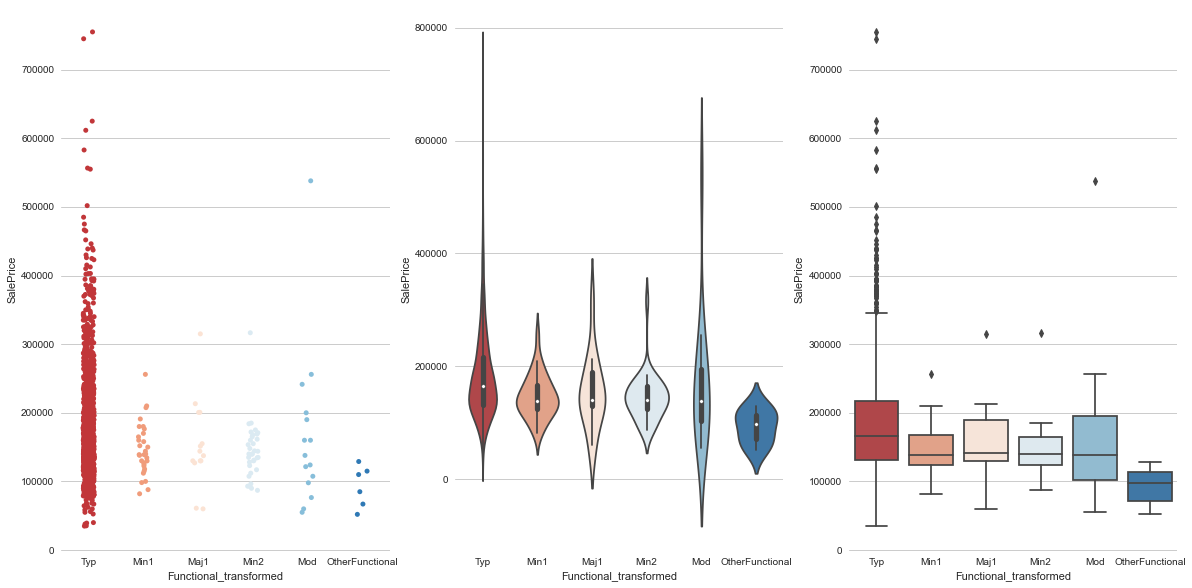

In [201]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
sns.stripplot(data=data_train_skip_columns, x = 'Functional_transformed', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Functional_transformed', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Functional_transformed', y='SalePrice', palette="RdBu", ax = ax[2]);

In [202]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="Functional_transformed", categories=["Typ", "Min1", "Maj1", "Min2", "Mod", "OtherFunctional"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Typ : Power_divergenceResult(statistic=0.0014419704602654968, pvalue=0.9999999999999999)
Min1 : Power_divergenceResult(statistic=0.20400343352947667, pvalue=0.9999993923067024)
Maj1 : Power_divergenceResult(statistic=0.09561957697121565, pvalue=0.9999999790109886)
Min2 : Power_divergenceResult(statistic=0.41711347411656735, pvalue=0.9999860759967455)
Mod : Power_divergenceResult(statistic=1.8514561338927593, pvalue=0.9936046206648175)
OtherFunctional : Power_divergenceResult(statistic=1.9710571567418038, pvalue=0.9919170625623519)


#### BsmtExposure

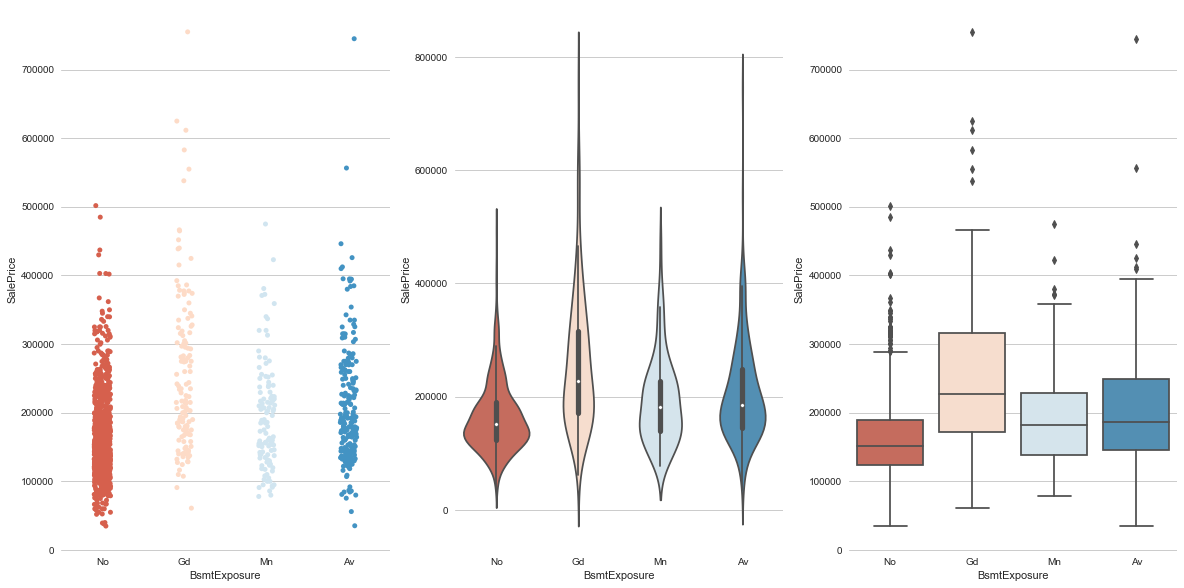

In [203]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
sns.stripplot(data=data_train_skip_columns, x = 'BsmtExposure', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'BsmtExposure', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'BsmtExposure', y='SalePrice', palette="RdBu", ax = ax[2]);

In [204]:
all_important_cat_columns_transformed += ["BsmtExposure"]

In [205]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="BsmtExposure", categories=["No", "Gd", "Mn", "Av"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

No : Power_divergenceResult(statistic=0.04801027546070186, pvalue=0.9999999990362037)
Gd : Power_divergenceResult(statistic=1.0110680362544164, pvalue=0.9994115702740062)
Mn : Power_divergenceResult(statistic=0.07638620398984668, pvalue=0.9999999922996322)
Av : Power_divergenceResult(statistic=0.12968846995662894, pvalue=0.9999999184274284)


#### Street

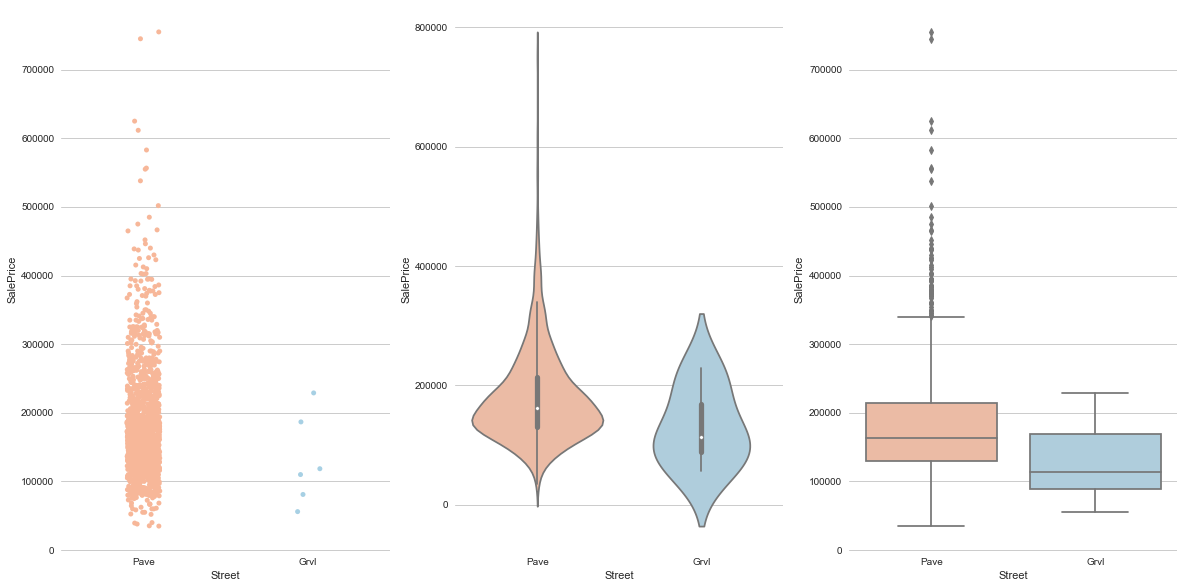

In [206]:
fig, ax = plt.subplots(1, 3, figsize = (20, 10))
sns.stripplot(data=data_train_skip_columns, x = 'Street', y='SalePrice', palette="RdBu", ax = ax[0])
sns.violinplot(data=data_train_skip_columns, x = 'Street', y='SalePrice', palette="RdBu", ax = ax[1])
sns.boxplot(data=data_train_skip_columns, x = 'Street', y='SalePrice', palette="RdBu", ax = ax[2]);

In [207]:
all_important_cat_columns_transformed += ["Street"]

In [208]:
test_chisquare_10bins(data=data_train_skip_columns, categorical_feature="Street", categories=["Pave", "Grvl"])
# по стат. критерию не можем отклонить гипотезу о независимости целевой переменной и категориальной

Pave : Power_divergenceResult(statistic=1.2862941753903203e-05, pvalue=1.0)
Grvl : Power_divergenceResult(statistic=0.7553819713609686, pvalue=0.9998242980260782)


<font color="green" size=3>1.5) Выводы</font>

По итогу выделяем те признаки, которые нас интересуют и в дальнейшем будем работать уже с нимми

In [209]:
all_important_num_columns

['ScreenPorch',
 'OverallQual',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea',
 'OpenPorchSF',
 'GarageYrBlt',
 'EnclosedPorch',
 'LotFrontage',
 'GrLivArea',
 'YearBuilt',
 '3SsnPorch',
 'LotArea',
 'TotRmsAbvGrd',
 'MSSubClass',
 'LowQualFinSF']

In [210]:
new_columns

['1stFlrSF+2ndFlrSF',
 'KitchenAbvGr_binary',
 'has_Fireplaces',
 'has_CentralAir',
 'Years',
 'has_pool',
 'OverallQual+Cond',
 'All_number_of_Bath']

In [211]:
all_important_cat_columns_transformed

['SaleType_transformed',
 'LotConfig',
 'Condition1_transformed',
 'KitchenQual',
 'MSZoning',
 'BsmtQual',
 'PavedDrive',
 'LotShape',
 'HeatingQC_transformed',
 'Neighborhood',
 'RoofStyle_transformed',
 'Electrical_transformed',
 'GarageFinish',
 'LandSlope',
 'ExterQual',
 'Exterior1st_transformed',
 'LandContour',
 'HouseStyle',
 'Foundation',
 'ExterCond_transformed',
 'BldgType',
 'Functional_transformed',
 'BsmtExposure',
 'Street']